<a href="https://colab.research.google.com/github/duanefonseca/CricketML/blob/main/analise_notas_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analise para as notas dos matriculados em um semestre

In [ ]:
import pandas as pd
import numpy as np

## df1 tem informações dos matriculadosno semestre a média no ENEM.
## df2 tem informações sobre notas no semestre

In [ ]:
df1 = pd.read_csv('/content/df1.csv')
df2 = pd.read_csv('/content/df2.csv')

This code:

Extracts all unique values from the 'Nome da Disciplina' column in df2
Adds each unique value as a new column in df1, initially filled with NaN values

In [ ]:
# Get unique discipline names from df2
unique_disciplines = df2['Nome da Disciplina'].unique()

# Initialize new columns in df1 with NaN values
for discipline in unique_disciplines:
    df1[discipline] = np.nan

# Now df1 has new columns for each unique discipline name
print(f"Added {len(unique_disciplines)} new columns to df1")
print(f"New df1 shape: {df1.shape}")

# Display the first few rows of the updated df1 with the new columns
df1.head()

Added 53 new columns to df1
New df1 shape: (140, 57)


,Matricula1,ENEM_media,Nome,Ingresso,Topografia I,Química Geral I,Int. Fis.,Geog. Econômica,Hidrografia,Geologia Geral,...,Div. Anim. I,Div. Anim. III,Bioq. II,Citogen. e Evolu.,Fund.Extensão Univer,Fis. Hum. I,Fun. Eco.,Fis. Veg. I,Microbiologia,Bioinformática I
0,143315,0.00,Adna Ferreira Silva Garcia,2020/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158518,488.49,Alessandra Domingues Rossales,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155607,583.75,Aline Cristina Lima de Lima,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,155609,526.77,Amanda Araujo de Oliveira,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,162701,574.18,Amanda Rodrigues da Costa,2023/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.columns

Index(['Matricula1', 'ENEM_media', 'Nome', 'Ingresso', 'Topografia I',
       'Química Geral I', 'Int. Fis.', 'Geog. Econômica', 'Hidrografia',
       'Geologia Geral', 'LIBRAS I', 'LIBRAS II', 'Fund. Met. Ens. Fund',
       'Estágio Ciências II', 'Estágio Biologia II', 'Did.', 'Fun. Met. Ens.',
       'Fun. Met. Ens. Cie.', 'Est. Cie. I', 'Edu. Fís. Basquete',
       'Edu. Fís. Musculação', 'Elem. Soc. da Educ.', 'Ele. Fil. Educação',
       'E. J. A.', 'Fil. Mundo Ocidental', 'Didática', 'Gên. Sex. Esp. Edu.',
       'Fu. Me. Edu. Inf. I', 'Antrop. Socio-Cultu.', 'Psic. Educação',
       'Geomorfologia I', 'Soc. Edu. Rel. ER', 'Entomologia',
       'Biologia Celular', 'Biofís. Apl. Enferm.', 'Abo. Mul. Dep. Quím.',
       'Farm. Dep. Químicas', 'TCC I', 'TCC II', 'Gen. Ger.', 'Evol.',
       'Biof. Rad.', 'Bio. Div. Fung.', 'Morf. Anat. Veg.', 'Hist. II',
       'Fis. Anim. Com. I', 'Fis. Anim. Comp. II', 'Div. Anim. I',
       'Div. Anim. III', 'Bioq. II', 'Citogen. e Evolu.',
     

This code:

Creates new columns in df1 for each unique discipline name from df2
Iterates through each row in df2
For each row, it finds matching students by comparing 'Matricula2' in df2 with 'Matricula1' in df1
When a match is found, it copies the 'NtF' value to the corresponding discipline column in df1
Maintains the original number of rows in df1

The approach uses .at[] for efficient single-cell updates and handles cases where a student ID might appear multiple times in df1.

In [ ]:
# For each row in df2
for index, row in df2.iterrows():
    matricula2 = row['Matricula2']
    disciplina = row['Nome da Disciplina']
    ntf = row['NtF']

    # Find matching row in df1
    matching_row = df1[df1['Matricula1'] == matricula2]

    # If match found, update the relevant column in df1
    if not matching_row.empty:
        df1.loc[matching_row.index[0], disciplina] = ntf

<ipython-input-5-bc471d025925>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[matching_row.index[0], disciplina] = ntf
<ipython-input-5-bc471d025925>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[matching_row.index[0], disciplina] = ntf
<ipython-input-5-bc471d025925>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[matching_row.index[0], disciplina] = ntf
<ipython-input-5-bc471d025925>:12: FutureWarning: Setting an item of incomp

In [ ]:
# Assuming df1_clean is your DataFrame
for column in df1.columns:
    print(f"Column '{column}' has data type: {df1[column].dtype}")

Column 'Matricula1' has data type: int64
Column 'ENEM_media' has data type: float64
Column 'Nome' has data type: object
Column 'Ingresso' has data type: object
Column 'Topografia I' has data type: object
Column 'Química Geral I' has data type: object
Column 'Int. Fis.' has data type: object
Column 'Geog. Econômica' has data type: object
Column 'Hidrografia' has data type: object
Column 'Geologia Geral' has data type: object
Column 'LIBRAS I' has data type: object
Column 'LIBRAS II' has data type: object
Column 'Fund. Met. Ens. Fund' has data type: object
Column 'Estágio Ciências II' has data type: object
Column 'Estágio Biologia II' has data type: object
Column 'Did.' has data type: object
Column 'Fun. Met. Ens.' has data type: object
Column 'Fun. Met. Ens. Cie.' has data type: object
Column 'Est. Cie. I' has data type: object
Column 'Edu. Fís. Basquete' has data type: object
Column 'Edu. Fís. Musculação' has data type: object
Column 'Elem. Soc. da Educ.' has data type: object
Column '

In [ ]:
# Select the column and filter for non-numeric data
#object_data = df1[df1['Estatística Descrit.'].apply(lambda x: not isinstance(x, (int, float)))]['Estatística Descrit.']

# Display the object data
#print(object_data)

In [ ]:
# Select the column and filter for float data
##float_data = df1[df1['Estatística Descrit.'].apply(lambda x: isinstance(x, float))]['Estatística Descrit.']

# Display the float data
#print(float_data)

In [ ]:
df1

,Matricula1,ENEM_media,Nome,Ingresso,Topografia I,Química Geral I,Int. Fis.,Geog. Econômica,Hidrografia,Geologia Geral,...,Div. Anim. I,Div. Anim. III,Bioq. II,Citogen. e Evolu.,Fund.Extensão Univer,Fis. Hum. I,Fun. Eco.,Fis. Veg. I,Microbiologia,Bioinformática I
0,143315,0.00,Adna Ferreira Silva Garcia,2020/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158518,488.49,Alessandra Domingues Rossales,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155607,583.75,Aline Cristina Lima de Lima,2022/1,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,8.3,NaN,NaN,NaN,RF,7.2,NaN,NaN,NaN
3,155609,526.77,Amanda Araujo de Oliveira,2022/1,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,1.8,6.5,NaN,NaN,NaN
4,162701,574.18,Amanda Rodrigues da Costa,2023/1,NaN,5.0,NaN,NaN,NaN,NaN,...,3.4,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,164454,476.27,Wagner Silva Moreira,2023/1,NaN,2.6,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
136,132899,618.16,Willian Mirapalheta Molina,2019/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,149487,608.48,Yasmin Elisabeth Dahmer Cardozo,2021/1,NaN,NaN,NaN,NaN,NaN,NaN,...,TRJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,132902,607.93,Yasmin Salcedo Dias,2019/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df1.loc[4]

In [ ]:
import numpy as np
import re

# Assuming df1 is already loaded from the previous code
# If not, you would need to load it again
# df1 = pd.read_csv('/content/df1.csv')

# Get all column names starting from 'primeira disciplina'
start_col = 4  # Fifth column index
course_columns = list(df1.columns)[start_col:]

# Function to inspect problematic columns
def inspect_column(df, column_name):
    print(f"\nInspecting column: {column_name}")
    # Get values that are not NaN
    non_nan_values = df[column_name].dropna().values

    if len(non_nan_values) == 0:
        print("No non-NaN values found.")
        return

    print(f"Sample values: {non_nan_values[:5]}")
    print(f"Value types: {[type(val) for val in non_nan_values[:5]]}")

    # Check if any values are strings
    string_values = [val for val in non_nan_values if isinstance(val, str)]
    if string_values:
        print(f"Found {len(string_values)} string values.")
        print(f"Sample string values: {string_values[:5]}")

# Let's inspect a couple of columns to understand the issue
for col in course_columns[:5]:  # Check first 5 columns
    inspect_column(df1, col)

# Function to clean and convert problematic values to numeric
def clean_and_convert(value):
    if pd.isna(value):
        return np.nan

    if isinstance(value, (int, float)):
        return value

    if isinstance(value, str):
        # Try to extract the first number from the string
        # This assumes the first part of the string is the intended grade
        matches = re.findall(r'(\d+\.?\d*)', value)
        if matches:
            try:
                return float(matches[0])
            except:
                return np.nan

    return np.nan

# Create a copy of df1 to avoid modifying original data
df1_clean = df1.copy()

# Clean all course columns
for col in course_columns:
    df1_clean[col] = df1_clean[col].apply(clean_and_convert)

# Now let's check if the cleaning worked
print("\nAfter cleaning:")
for col in course_columns[:5]:  # Check first 5 columns
    print(f"\nColumn: {col}")
    non_nan_values = df1_clean[col].dropna().values
    if len(non_nan_values) > 0:
        print(f"Sample values: {non_nan_values[:5]}")
        print(f"Value types: {[type(val) for val in non_nan_values[:5]]}")

# Now we can calculate statistics on the cleaned data
# Create empty lists to store results
course_names = []
means = []
standard_errors = []
counts = []

# Calculate statistics for each course column using cleaned data
for col in course_columns:
    # Get non-NaN values for this course
    values = df1_clean[col].dropna()

    # Calculate statistics if there are any values
    if len(values) > 0:
        mean_val = values.mean()
        std_val = values.std()
        n = len(values)
        se_val = std_val / np.sqrt(n) if n > 1 else np.nan

        # Append results to lists
        course_names.append(col)
        means.append(mean_val)
        standard_errors.append(se_val)
        counts.append(n)
    else:
        # Handle case where there are no values
        course_names.append(col)
        means.append(np.nan)
        standard_errors.append(np.nan)
        counts.append(0)

# Create a DataFrame with the results
stats_df = pd.DataFrame({
    'Course': course_names,
    'Mean': means,
    'SE': standard_errors,
    'N': counts
})

# Round numeric columns to 2 decimal places
stats_df['Mean'] = stats_df['Mean'].round(2)
stats_df['SE'] = stats_df['SE'].round(2)

# Sort by course name
stats_df = stats_df.sort_values('Course')

# Display the results
print("\nDescriptive Statistics for Courses:")
print(stats_df)

# Optional: Save the results to a CSV file
#stats_df.to_csv('course_statistics.csv', index=False)


Inspecting column: Topografia I
Sample values: ['9.0']
Value types: [<class 'str'>]
Found 1 string values.
Sample string values: ['9.0']

Inspecting column: Química Geral I
Sample values: ['5.0' '7.0' '5.0' '3.8' '7.0']
Value types: [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]
Found 61 string values.
Sample string values: ['5.0', '7.0', '5.0', '3.8', '7.0']

Inspecting column: Int. Fis.
Sample values: ['10.0' '10.0' 'RF']
Value types: [<class 'str'>, <class 'str'>, <class 'str'>]
Found 3 string values.
Sample string values: ['10.0', '10.0', 'RF']

Inspecting column: Geog. Econômica
Sample values: ['7.8']
Value types: [<class 'str'>]
Found 1 string values.
Sample string values: ['7.8']

Inspecting column: Hidrografia
Sample values: ['6.4']
Value types: [<class 'str'>]
Found 1 string values.
Sample string values: ['6.4']

After cleaning:

Column: Topografia I
Sample values: [9.]
Value types: [<class 'numpy.float64'>]

Column: Química Geral I
Sample values:

In [ ]:
# Optional: Save the results to a CSV file
stats_df.to_csv('course_statistics.csv', index=False)

In [ ]:
df1_clean

,Matricula1,ENEM_media,Nome,Ingresso,Topografia I,Química Geral I,Int. Fis.,Geog. Econômica,Hidrografia,Geologia Geral,...,Div. Anim. I,Div. Anim. III,Bioq. II,Citogen. e Evolu.,Fund.Extensão Univer,Fis. Hum. I,Fun. Eco.,Fis. Veg. I,Microbiologia,Bioinformática I
0,143315,0.00,Adna Ferreira Silva Garcia,2020/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158518,488.49,Alessandra Domingues Rossales,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155607,583.75,Aline Cristina Lima de Lima,2022/1,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,8.3,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN
3,155609,526.77,Amanda Araujo de Oliveira,2022/1,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,1.8,6.5,NaN,NaN,NaN
4,162701,574.18,Amanda Rodrigues da Costa,2023/1,NaN,5.0,NaN,NaN,NaN,NaN,...,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,164454,476.27,Wagner Silva Moreira,2023/1,NaN,2.6,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,132899,618.16,Willian Mirapalheta Molina,2019/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,149487,608.48,Yasmin Elisabeth Dahmer Cardozo,2021/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,132902,607.93,Yasmin Salcedo Dias,2019/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df1_clean.to_csv('df1_clean.csv', index=False)

# if you need to modify the code:

To filter for specific courses, add a list of course names and filter plot_df accordingly

To change the minimum number of data points required, change the 5 in course_counts >= 5

To change the color scheme, modify the palette='viridis' parameter

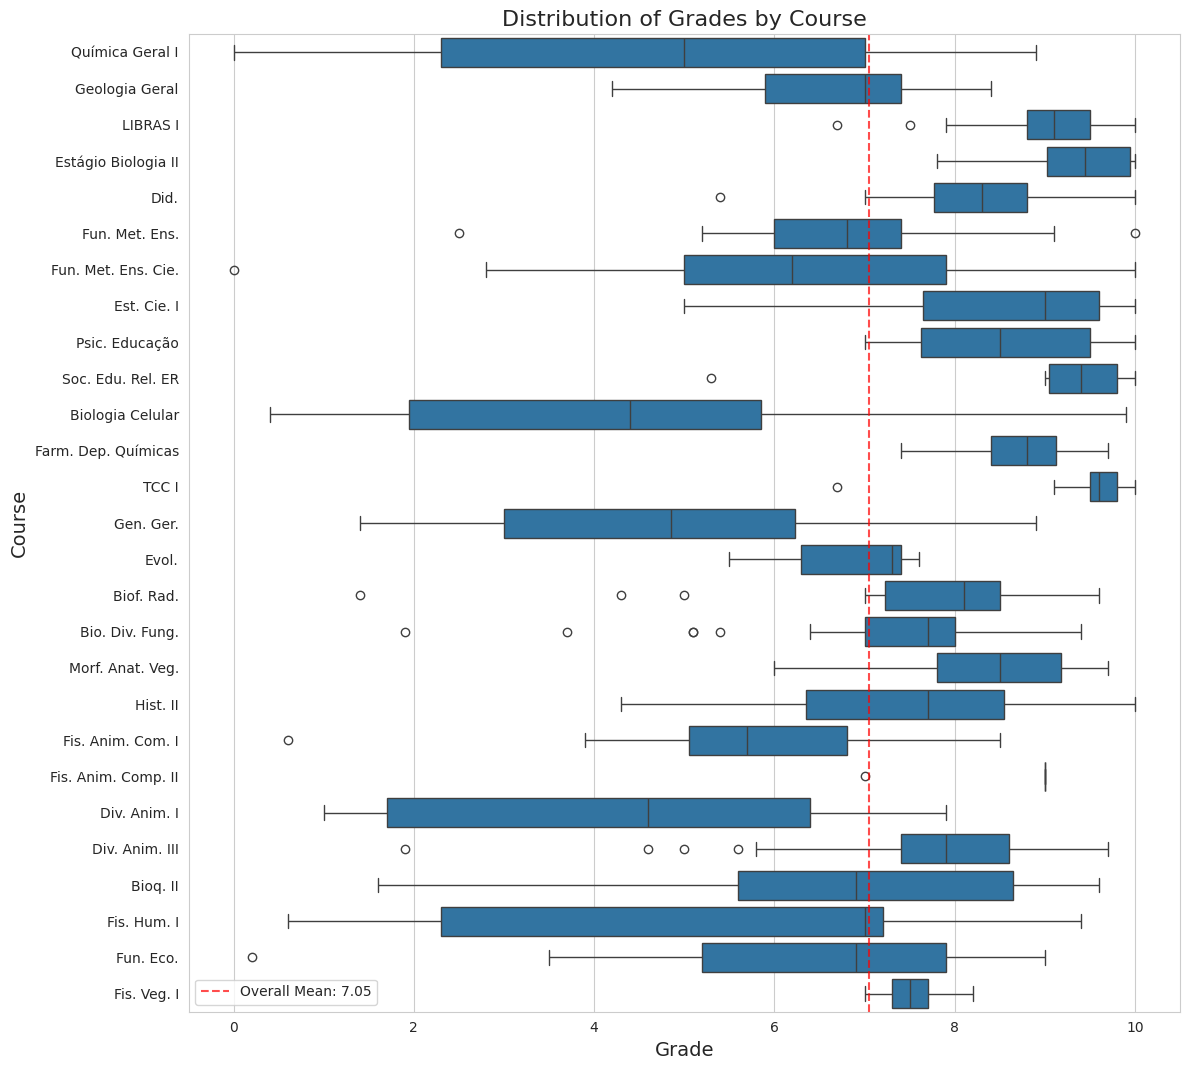

<ipython-input-15-728d2fed0c13>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df_filtered, x='Grade', y='Course', palette='viridis')


<Figure size 640x480 with 0 Axes>

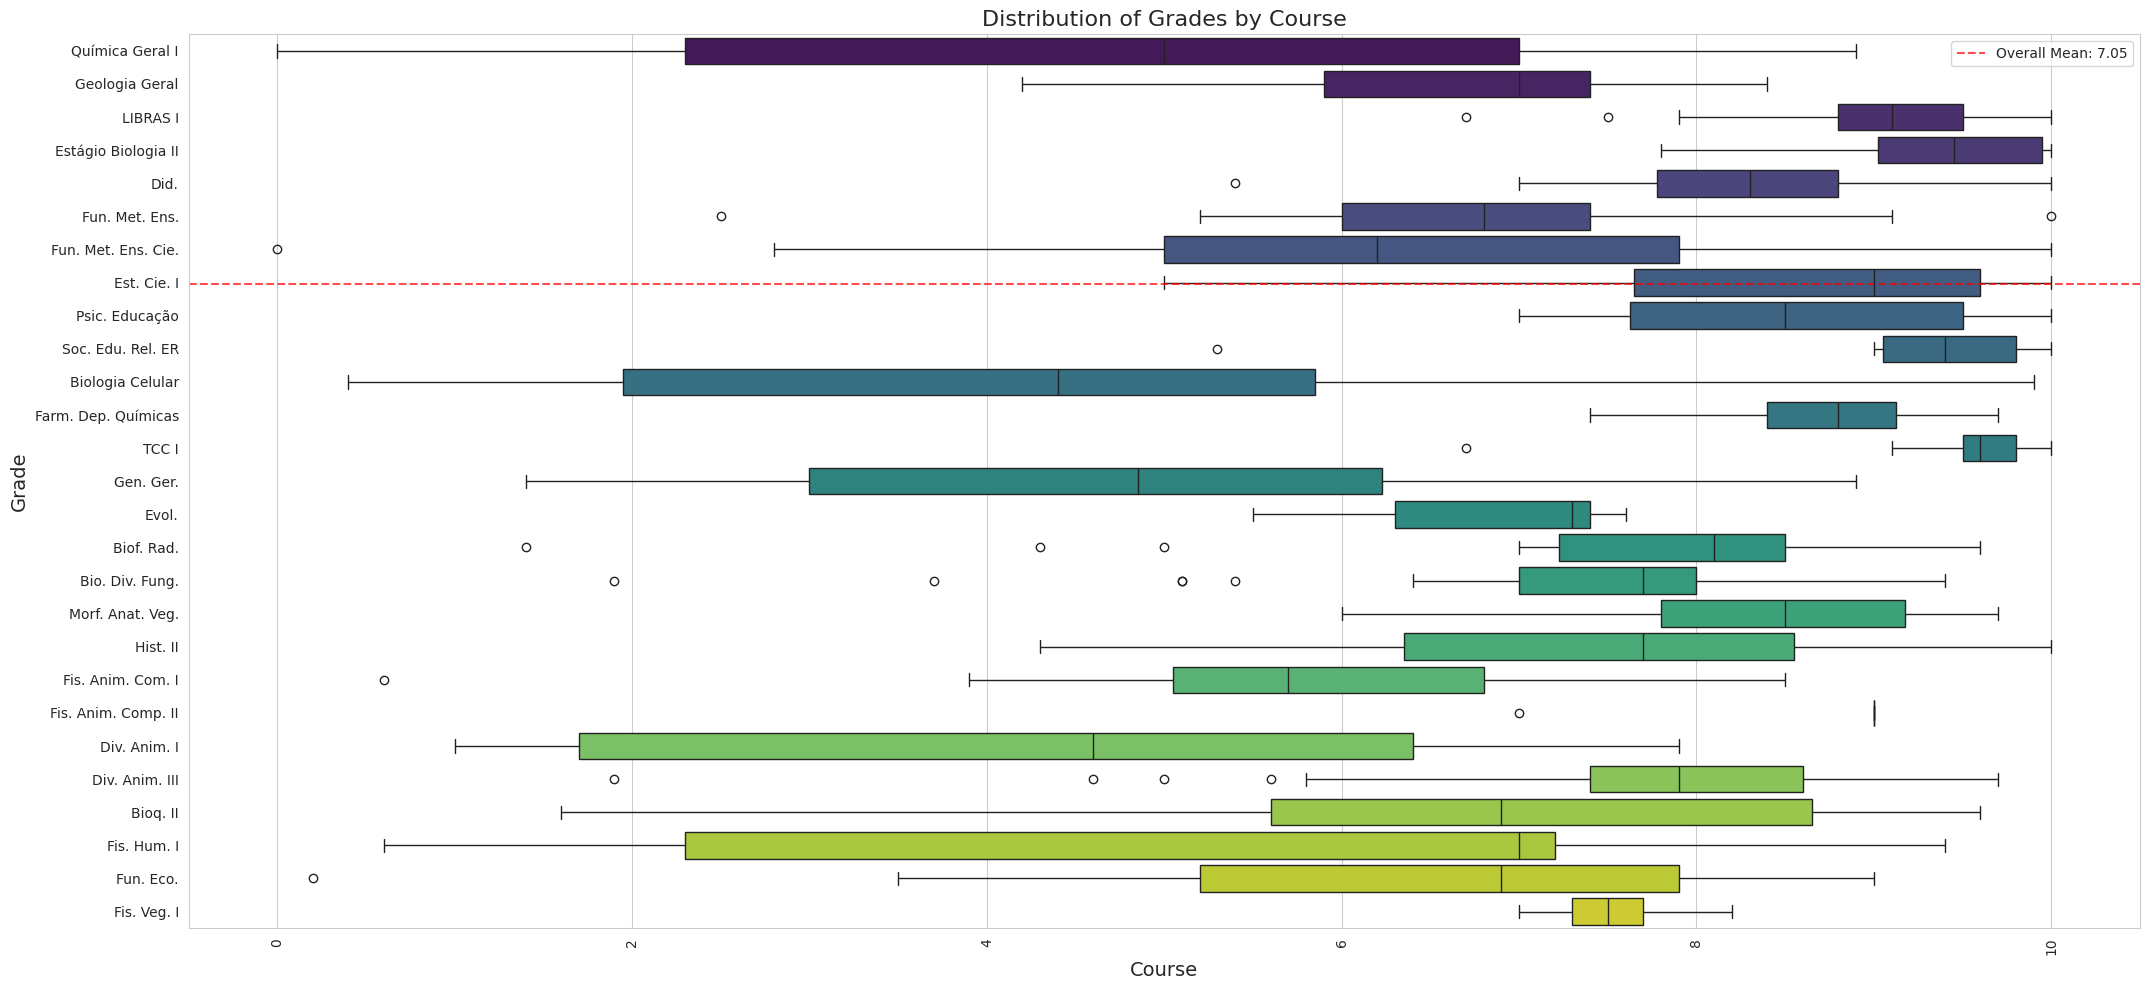

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming df1 and df1_clean are already available from previous code
# If not, recreate df1_clean with the cleaning function

# If df1_clean is not available, uncomment and run this code block:
'''
# Load original data
# df1 = pd.read_csv('/content/df1.csv')

# Get all column names starting from 'Estatística Descrit.'
start_col = list(df1.columns).index('Estatística Descrit.')
course_columns = list(df1.columns)[start_col:]

# Function to clean and convert problematic values to numeric
def clean_and_convert(value):
    if pd.isna(value):
        return np.nan

    if isinstance(value, (int, float)):
        return value

    if isinstance(value, str):
        # Try to extract the first number from the string
        matches = re.findall(r'(\d+\.?\d*)', value)
        if matches:
            try:
                return float(matches[0])
            except:
                return np.nan

    return np.nan

# Create a copy of df1 and clean all course columns
df1_clean = df1.copy()
for col in course_columns:
    df1_clean[col] = df1_clean[col].apply(clean_and_convert)
'''

# Get course columns
start_col = 4  # Fifth column index
course_columns = list(df1.columns)[start_col:]

# Create a long-format DataFrame for seaborn boxplot
data_for_plot = []

for col in course_columns:
    # Get non-NaN values for this course
    values = df1_clean[col].dropna()

    # Add each value to the data list with the course name
    for val in values:
        data_for_plot.append({
            'Course': col,
            'Grade': val
        })

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Filter out courses with too few data points (optional)
course_counts = plot_df['Course'].value_counts()
courses_to_plot = course_counts[course_counts >= 3].index.tolist()

if courses_to_plot:
    plot_df_filtered = plot_df[plot_df['Course'].isin(courses_to_plot)]
else:
    # If no courses have at least 3 data points, use all data
    plot_df_filtered = plot_df

# Set up the figure size based on the number of courses
plt.figure(figsize=(12, max(8, len(courses_to_plot) * 0.4)))

# Create the boxplot
sns.set_style('whitegrid')
#ax = sns.boxplot(data=plot_df_filtered, x='Grade', y='Course', orient='h', palette='viridis')
ax = sns.boxplot(data=plot_df_filtered, x='Grade', y='Course', orient='h')

# Add a vertical line for the overall mean
overall_mean = plot_df_filtered['Grade'].mean()
plt.axvline(x=overall_mean, color='red', linestyle='--', alpha=0.7, label=f'Overall Mean: {overall_mean:.2f}')

# Enhance the plot
plt.title('Distribution of Grades by Course', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Course', fontsize=14)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Save the plot
plt.savefig('course_grades_boxplot.png', dpi=300, bbox_inches='tight')

# Alternative: Create a vertical boxplot if there are many courses
if len(courses_to_plot) > 15:
    plt.figure(figsize=(max(12, len(courses_to_plot) * 0.8), 10))
    sns.boxplot(data=plot_df_filtered, x='Grade', y='Course', palette='viridis')
    plt.title('Distribution of Grades by Course', fontsize=16)
    plt.xlabel('Course', fontsize=14)
    plt.ylabel('Grade', fontsize=14)
    plt.xticks(rotation=90)
    plt.axhline(y=overall_mean, color='red', linestyle='--', alpha=0.7, label=f'Overall Mean: {overall_mean:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # plt.savefig('course_grades_boxplot_vertical.png', dpi=300, bbox_inches='tight')

In [ ]:
# Optional: Save the plot
plt.savefig('course_grades_boxplot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import re

In [ ]:
# Get course columns
start_col = 4  # Fifth column index
course_columns = list(df1.columns)[start_col:]

# Create a long-format DataFrame for plotting
data_for_plot = []

for col in course_columns:
    # Get non-NaN values for this course
    values = df1_clean[col].dropna()

    # Add each value to the data list with the course name
    for val in values:
        data_for_plot.append({
            'Course': col,
            'Grade': val
        })

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Filter out courses with too few data points (optional)
course_counts = plot_df['Course'].value_counts()
courses_to_plot = course_counts[course_counts >= 3].index.tolist()

if courses_to_plot:
    plot_df_filtered = plot_df[plot_df['Course'].isin(courses_to_plot)]
else:
    # If no courses have at least 3 data points, use all data
    plot_df_filtered = plot_df

# Calculate overall statistics for annotation
overall_mean = plot_df_filtered['Grade'].mean()
course_means = plot_df_filtered.groupby('Course')['Grade'].mean().reset_index()

# Sort courses by mean grade (optional)
course_means = course_means.sort_values('Grade', ascending=False)
sorted_courses = course_means['Course'].tolist()
plot_df_filtered['Course'] = pd.Categorical(plot_df_filtered['Course'],
                                           categories=sorted_courses,
                                           ordered=True)

# Create the interactive boxplot with Plotly
fig = px.box(plot_df_filtered,
             x='Grade',
             y='Course',
             orientation='h',
             color='Course',
             title='Interactive Distribution of Grades by Course',
             labels={'Grade': 'Grade Value', 'Course': 'Course Name'},
             height=max(600, len(courses_to_plot) * 30),
             width=900,
             points='outliers',  # Show only outliers as individual points
             hover_data=['Grade'])  # Data to show on hover

# Add a vertical line for the overall mean
fig.add_vline(x=overall_mean,
              line_width=2,
              line_dash="dash",
              line_color="red",
              annotation_text=f"Overall Mean: {overall_mean:.2f}",
              annotation_position="top")

# Customize the layout further
fig.update_layout(
    font=dict(size=12),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(l=20, r=20, t=60, b=20),
    plot_bgcolor='rgba(240,240,240,0.5)',  # Light gray background
    showlegend=False  # Hide the legend since colors are just for visual distinction
)

# Add information about the number of data points
for i, course in enumerate(plot_df_filtered['Course'].cat.categories):
    count = len(plot_df_filtered[plot_df_filtered['Course'] == course])
    mean = plot_df_filtered[plot_df_filtered['Course'] == course]['Grade'].mean()
    fig.add_annotation(
        x=0,  # At the start
        y=course,
        text=f"n={count}, μ={mean:.2f}",
        showarrow=False,
        xshift=-50,
        font=dict(size=10),
        align="right"
    )

# Show the interactive figure
fig.show()



<ipython-input-19-6d6a78a36f0d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df_filtered['Course'] = pd.Categorical(plot_df_filtered['Course'],


In [ ]:
# If you're running this in Google Colab, you might need to install the appropriate packages:
# !pip install plotly
# If you want to save the interactive HTML file:
fig.write_html('interactive_course_grades_boxplot.html')

In [ ]:
import pandas as pd
import numpy as np

# Assuming df1_clean is already available from previous code
# If not, you would need to create it first

# Get all course columns (starting from 'Estatística Descrit.')
start_col = 4  # Fifth column index
course_columns = list(df1.columns)[start_col:]

# Function to calculate the mean of non-NaN values in a row
def calculate_row_mean(row):
    # Extract only the course values from the row
    course_values = row[course_columns]
    # Calculate mean of non-NaN values
    return course_values.mean(skipna=True)

# Calculate average grade for each student and add as a new column
df1_clean['Average_Grade'] = df1_clean.apply(calculate_row_mean, axis=1)

# Round to 2 decimal places
df1_clean['Average_Grade'] = df1_clean['Average_Grade'].round(2)

# Display the first few rows to verify
print(df1_clean[['Matricula1', 'Nome', 'Average_Grade']].head())

# Basic statistics of the average grades
print("\nStatistics of Average Grades:")
print(df1_clean['Average_Grade'].describe())

# Count of students with and without calculated averages
null_count = df1_clean['Average_Grade'].isna().sum()
total_count = len(df1_clean)
print(f"\nStudents with calculated average: {total_count - null_count}")
print(f"Students without any grades (NaN average): {null_count}")

# Optional: Find students with highest and lowest averages
if not df1_clean['Average_Grade'].isna().all():
    top_students = df1_clean.nlargest(5, 'Average_Grade')[['Matricula1', 'Nome', 'Average_Grade']]
    bottom_students = df1_clean.nsmallest(5, 'Average_Grade')[['Matricula1', 'Nome', 'Average_Grade']]

    print("\nTop 5 students by average grade:")
    print(top_students)

    print("\nBottom 5 students by average grade:")
    print(bottom_students)

   Matricula1                           Nome  Average_Grade
0      143315     Adna Ferreira Silva Garcia          10.00
1      158518  Alessandra Domingues Rossales           4.53
2      155607    Aline Cristina Lima de Lima           6.19
3      155609      Amanda Araujo de Oliveira           6.40
4      162701      Amanda Rodrigues da Costa           6.56

Statistics of Average Grades:
count    118.000000
mean       7.302119
std        1.588733
min        2.310000
25%        6.400000
50%        7.480000
75%        8.445000
max       10.000000
Name: Average_Grade, dtype: float64

Students with calculated average: 118
Students without any grades (NaN average): 22

Top 5 students by average grade:
    Matricula1                        Nome  Average_Grade
0       143315  Adna Ferreira Silva Garcia          10.00
13      163448      Andressa Mai Matsumoto          10.00
80      143334     Larissa Bandeira Maciel           9.95
75      163286  Julie Medeiros da Silveira           9.90
37  

In [ ]:
df1_clean.head()

,Matricula1,ENEM_media,Nome,Ingresso,Topografia I,Química Geral I,Int. Fis.,Geog. Econômica,Hidrografia,Geologia Geral,...,Div. Anim. III,Bioq. II,Citogen. e Evolu.,Fund.Extensão Univer,Fis. Hum. I,Fun. Eco.,Fis. Veg. I,Microbiologia,Bioinformática I,Average_Grade
0,143315,0.00,Adna Ferreira Silva Garcia,2020/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00
1,158518,488.49,Alessandra Domingues Rossales,2022/1,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.53
2,155607,583.75,Aline Cristina Lima de Lima,2022/1,NaN,5.0,NaN,NaN,NaN,NaN,...,8.3,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,6.19
3,155609,526.77,Amanda Araujo de Oliveira,2022/1,NaN,7.0,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,1.8,6.5,NaN,NaN,NaN,6.40
4,162701,574.18,Amanda Rodrigues da Costa,2023/1,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.56


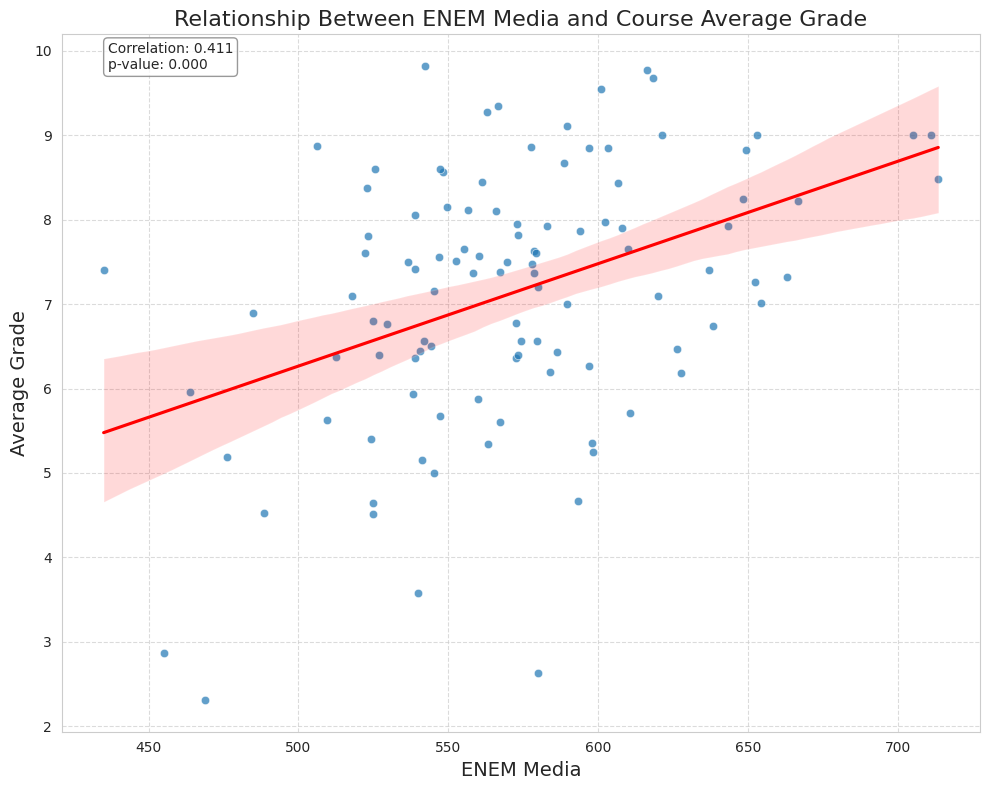

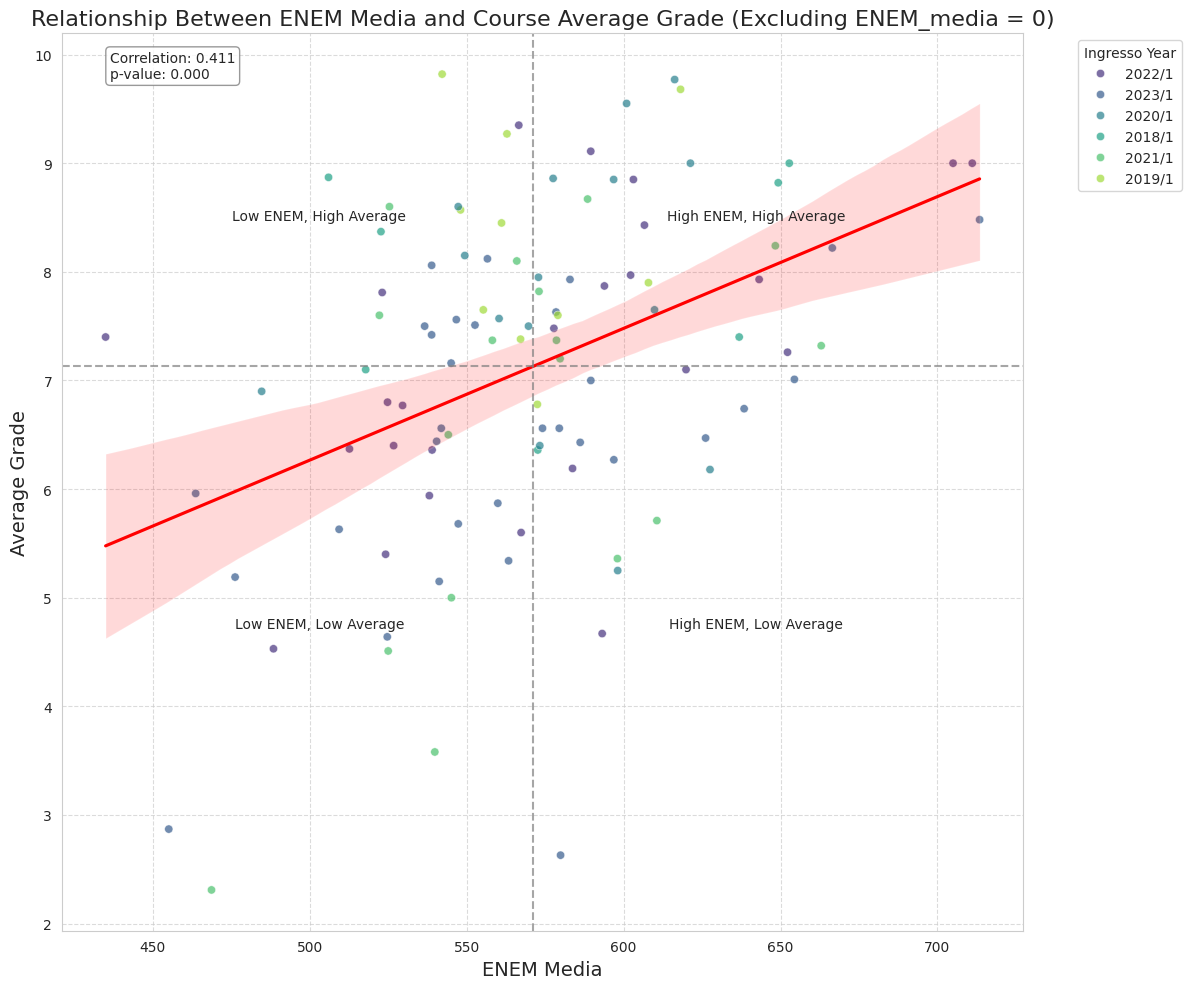

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df1_clean with Average_Grade column is already available
# If not, you would need to create it first

# Filter out rows where ENEM_media equals 0
df1_filtered = df1_clean[df1_clean['ENEM_media'] != 0]

# Create a scatter plot of ENEM_media vs Average_Grade
plt.figure(figsize=(10, 8))

# Filter out rows with NaN values in either column to avoid plotting errors
plot_data = df1_filtered.dropna(subset=['ENEM_media', 'Average_Grade'])

# Basic scatter plot
ax = sns.scatterplot(data=plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    alpha=0.7)

# Add a regression line with confidence interval
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate correlation coefficient and p-value
correlation, p_value = stats.pearsonr(plot_data['ENEM_media'], plot_data['Average_Grade'])

# Add correlation information to the plot
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Course Average Grade', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create an enhanced version with additional insights
plt.figure(figsize=(12, 10))

# Create a scatter plot with point color based on 'Ingresso' year if available
if 'Ingresso' in df1_filtered.columns and df1_filtered['Ingresso'].notna().any():
    try:
        # Try to use 'Ingresso' as color, assuming it's a categorical or year variable
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                hue='Ingresso',
                                palette='viridis',
                                alpha=0.7)
        plt.legend(title='Ingresso Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    except:
        # If there's an error (e.g., too many categories), fall back to basic plot
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                alpha=0.7)
else:
    # Basic scatter plot if 'Ingresso' isn't usable
    scatter = sns.scatterplot(data=plot_data,
                            x='ENEM_media',
                            y='Average_Grade',
                            alpha=0.7)

# Add a regression line
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate average values for reference lines
avg_enem = plot_data['ENEM_media'].mean()
avg_grade = plot_data['Average_Grade'].mean()

# Add reference lines at averages
plt.axvline(x=avg_enem, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=avg_grade, color='gray', linestyle='--', alpha=0.7)

# Add text labels for the quadrants
plt.annotate('High ENEM, High Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('Low ENEM, High Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('High ENEM, Low Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

plt.annotate('Low ENEM, Low Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

# Add correlation information
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Course Average Grade (Excluding ENEM_media = 0)', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the enhanced plot
plt.show()

# Optional: Create an interactive version with Plotly
try:
    import plotly.express as px

    # Create interactive scatter plot
    fig = px.scatter(plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    title='Interactive: ENEM Media vs Average Grade (Excluding ENEM_media = 0)',
                    labels={'ENEM_media': 'ENEM Media', 'Average_Grade': 'Average Grade'},
                    hover_data=['Matricula1', 'Nome'] if 'Nome' in plot_data.columns else ['Matricula1'],
                    trendline='ols',  # Add ordinary least squares regression line
                    trendline_color_override='red')

    # Add annotation with correlation
    fig.add_annotation(
        x=0.05,
        y=0.95,
        xref="paper",
        yref="paper",
        text=f"Correlation: {correlation:.3f}<br>p-value: {p_value:.3e}",
        showarrow=False,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )

    # Show the interactive plot
    fig.show()

    # To save the interactive plot as HTML:
    # fig.write_html("enem_vs_average_interactive.html")

except ImportError:
    print("Plotly not installed. Skipping interactive plot.")

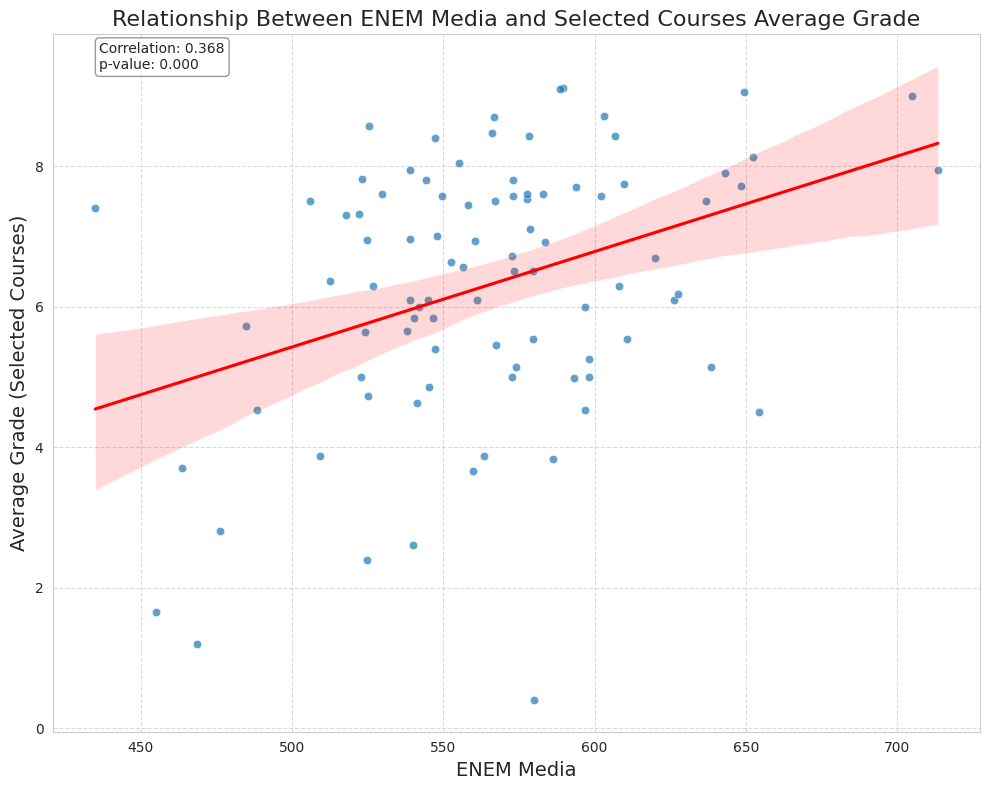

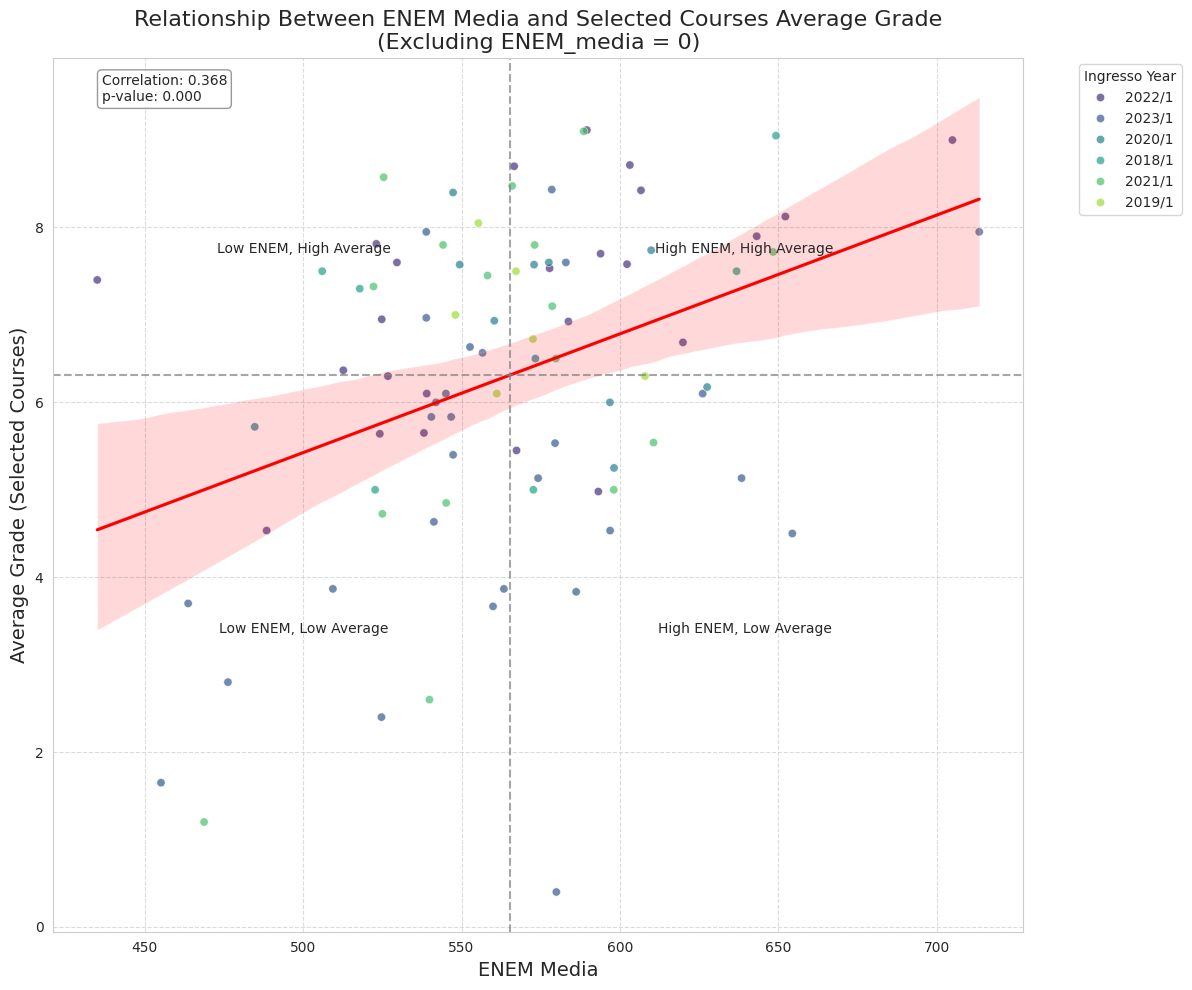

Average calculated using 15 out of 15 specified columns.
Columns used: ['Farm. Dep. Químicas', 'Gen. Ger.', 'Evol.', 'Biof. Rad.', 'Bio. Div. Fung.', 'Biologia Celular', 'Morf. Anat. Veg.', 'Hist. II', 'Fis. Anim. Com. I', 'Div. Anim. I', 'Div. Anim. III', 'Bioq. II', 'Fis. Hum. I', 'Fun. Eco.', 'Fis. Veg. I']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df1_clean is already available
# Define the specific columns to use for Average_Grade calculation
selected_columns = [
    'Farm. Dep. Químicas', 'Gen. Ger.', 'Evol.',
    'Biof. Rad.', 'Bio. Div. Fung.', 'Biologia Celular', 'Morf. Anat. Veg.', 'Hist. II',
    'Fis. Anim. Com. I', 'Div. Anim. I',
    'Div. Anim. III', 'Bioq. II',
    'Fis. Hum. I', 'Fun. Eco.', 'Fis. Veg. I'
]

# Calculate Average_Grade using only the selected columns
# First check if the columns exist in df1_clean
available_columns = [col for col in selected_columns if col in df1_clean.columns]

if not available_columns:
    raise ValueError("None of the specified columns exist in the dataframe")

# Calculate the average grade using only the available columns from the list
df1_clean['Average_Grade'] = df1_clean[available_columns].mean(axis=1)

# Filter out rows where ENEM_media equals 0
df1_filtered = df1_clean[df1_clean['ENEM_media'] != 0]

# Create a scatter plot of ENEM_media vs Average_Grade
plt.figure(figsize=(10, 8))

# Filter out rows with NaN values in either column to avoid plotting errors
plot_data = df1_filtered.dropna(subset=['ENEM_media', 'Average_Grade'])

# Basic scatter plot
ax = sns.scatterplot(data=plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    alpha=0.7)

# Add a regression line with confidence interval
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate correlation coefficient and p-value
correlation, p_value = stats.pearsonr(plot_data['ENEM_media'], plot_data['Average_Grade'])

# Add correlation information to the plot
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Selected Courses Average Grade', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade (Selected Courses)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create an enhanced version with additional insights
plt.figure(figsize=(12, 10))

# Create a scatter plot with point color based on 'Ingresso' year if available
if 'Ingresso' in df1_filtered.columns and df1_filtered['Ingresso'].notna().any():
    try:
        # Try to use 'Ingresso' as color, assuming it's a categorical or year variable
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                hue='Ingresso',
                                palette='viridis',
                                alpha=0.7)
        plt.legend(title='Ingresso Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    except:
        # If there's an error (e.g., too many categories), fall back to basic plot
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                alpha=0.7)
else:
    # Basic scatter plot if 'Ingresso' isn't usable
    scatter = sns.scatterplot(data=plot_data,
                            x='ENEM_media',
                            y='Average_Grade',
                            alpha=0.7)

# Add a regression line
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate average values for reference lines
avg_enem = plot_data['ENEM_media'].mean()
avg_grade = plot_data['Average_Grade'].mean()

# Add reference lines at averages
plt.axvline(x=avg_enem, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=avg_grade, color='gray', linestyle='--', alpha=0.7)

# Add text labels for the quadrants
plt.annotate('High ENEM, High Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('Low ENEM, High Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('High ENEM, Low Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

plt.annotate('Low ENEM, Low Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

# Add correlation information
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Selected Courses Average Grade\n(Excluding ENEM_media = 0)', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade (Selected Courses)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the enhanced plot
plt.show()

# Optional: Create an interactive version with Plotly
try:
    import plotly.express as px

    # Create interactive scatter plot
    fig = px.scatter(plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    title='Interactive: ENEM Media vs Selected Courses Average Grade\n(Excluding ENEM_media = 0)',
                    labels={'ENEM_media': 'ENEM Media', 'Average_Grade': 'Average Grade (Selected Courses)'},
                    hover_data=['Matricula1', 'Nome'] if 'Nome' in plot_data.columns else ['Matricula1'],
                    trendline='ols',  # Add ordinary least squares regression line
                    trendline_color_override='red')

    # Add annotation with correlation
    fig.add_annotation(
        x=0.05,
        y=0.95,
        xref="paper",
        yref="paper",
        text=f"Correlation: {correlation:.3f}<br>p-value: {p_value:.3e}<br>Using {len(available_columns)} selected courses",
        showarrow=False,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )

    # Add which columns were used in the calculation
    fig.add_annotation(
        x=0.5,
        y=-0.15,
        xref="paper",
        yref="paper",
        text=f"Courses used: {', '.join(available_columns[:5])}{'...' if len(available_columns) > 5 else ''}",
        showarrow=False,
        font=dict(size=10),
        align="center"
    )

    # Show the interactive plot
    fig.show()

    # To save the interactive plot as HTML:
    # fig.write_html("enem_vs_selected_courses_average_interactive.html")

except ImportError:
    print("Plotly not installed. Skipping interactive plot.")

# Print the number of columns used in the calculation
print(f"Average calculated using {len(available_columns)} out of {len(selected_columns)} specified columns.")
print(f"Columns used: {available_columns}")

In [ ]:
# To save the interactive plot as HTML:
fig.write_html("enem_vs_average_interactive.html")

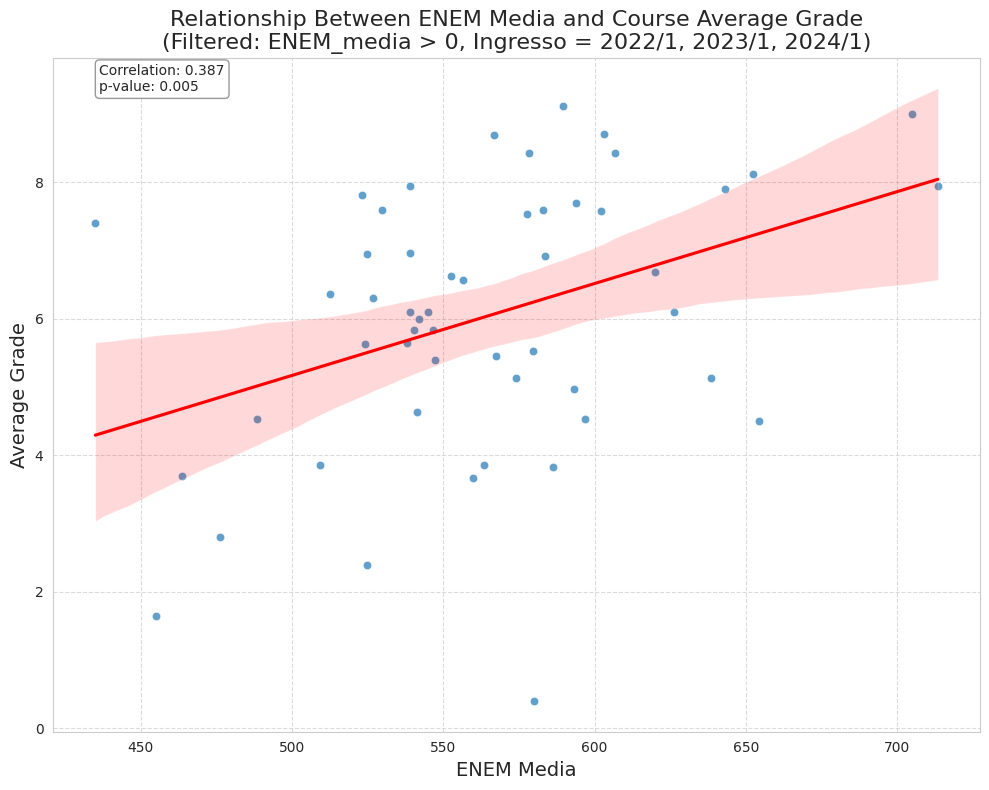

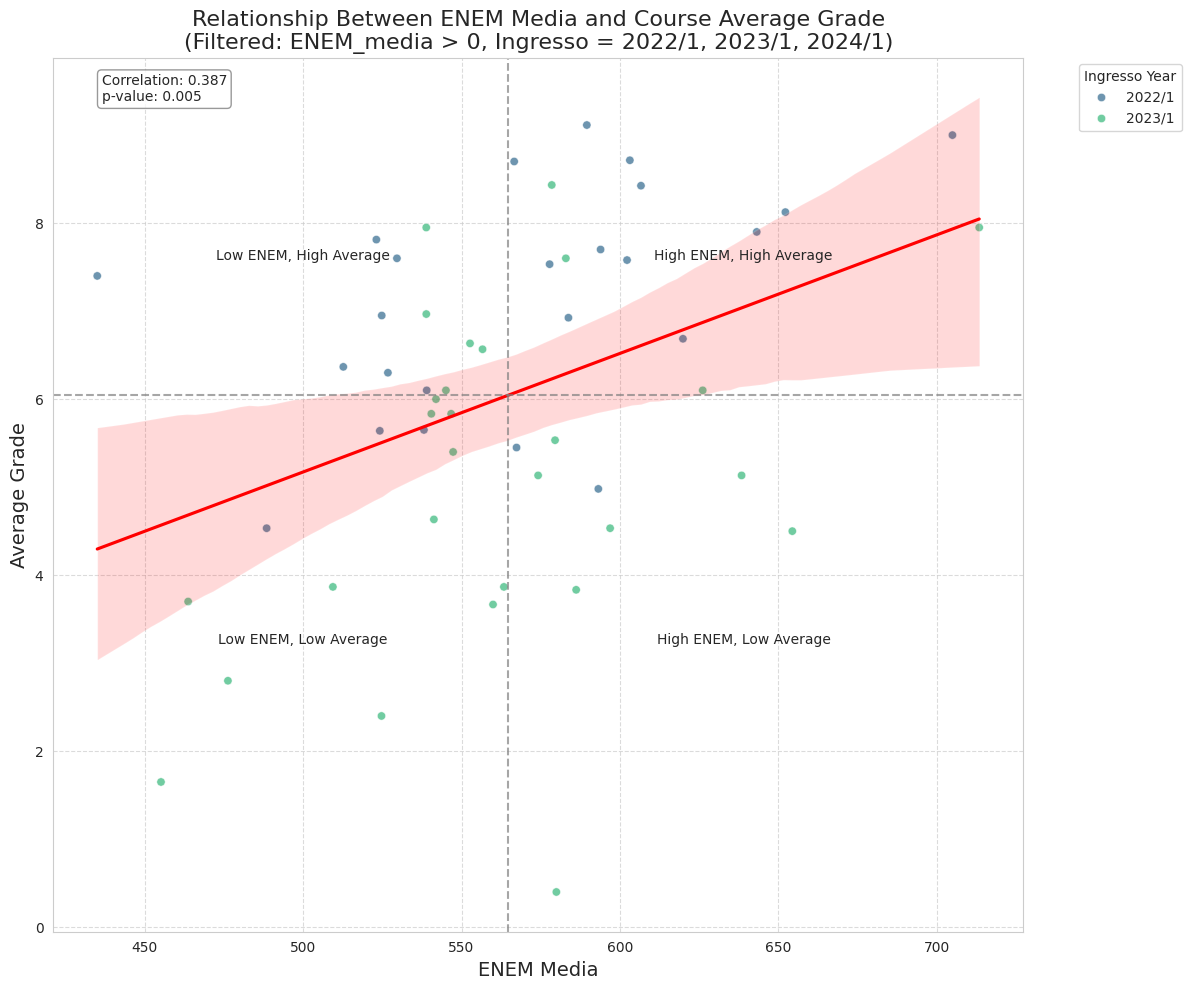

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df1_clean with Average_Grade column is already available
# If not, you would need to create it first

# Filter out rows where ENEM_media equals 0
# AND where Ingresso is 2022/1, 2023/1, or 2024/1
df1_filtered = df1_clean[
    (df1_clean['ENEM_media'] != 0) &
    (df1_clean['Ingresso'].isin(['2022/1', '2023/1', '2024/1']))
]

# Create a scatter plot of ENEM_media vs Average_Grade
plt.figure(figsize=(10, 8))

# Filter out rows with NaN values in either column to avoid plotting errors
plot_data = df1_filtered.dropna(subset=['ENEM_media', 'Average_Grade'])

# Basic scatter plot
ax = sns.scatterplot(data=plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    alpha=0.7)

# Add a regression line with confidence interval
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate correlation coefficient and p-value
correlation, p_value = stats.pearsonr(plot_data['ENEM_media'], plot_data['Average_Grade'])

# Add correlation information to the plot
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Course Average Grade\n(Filtered: ENEM_media > 0, Ingresso = 2022/1, 2023/1, 2024/1)', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Create an enhanced version with additional insights
plt.figure(figsize=(12, 10))

# Create a scatter plot with point color based on 'Ingresso' year if available
if 'Ingresso' in df1_filtered.columns and df1_filtered['Ingresso'].notna().any():
    try:
        # Try to use 'Ingresso' as color, assuming it's a categorical or year variable
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                hue='Ingresso',
                                palette='viridis',
                                alpha=0.7)
        plt.legend(title='Ingresso Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    except:
        # If there's an error (e.g., too many categories), fall back to basic plot
        scatter = sns.scatterplot(data=plot_data,
                                x='ENEM_media',
                                y='Average_Grade',
                                alpha=0.7)
else:
    # Basic scatter plot if 'Ingresso' isn't usable
    scatter = sns.scatterplot(data=plot_data,
                            x='ENEM_media',
                            y='Average_Grade',
                            alpha=0.7)

# Add a regression line
sns.regplot(data=plot_data,
           x='ENEM_media',
           y='Average_Grade',
           scatter=False,
           line_kws={"color": "red"})

# Calculate average values for reference lines
avg_enem = plot_data['ENEM_media'].mean()
avg_grade = plot_data['Average_Grade'].mean()

# Add reference lines at averages
plt.axvline(x=avg_enem, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=avg_grade, color='gray', linestyle='--', alpha=0.7)

# Add text labels for the quadrants
plt.annotate('High ENEM, High Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('Low ENEM, High Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade + (plot_data['Average_Grade'].max() - avg_grade)/2),
            ha='center')

plt.annotate('High ENEM, Low Average',
            xy=(avg_enem + (plot_data['ENEM_media'].max() - avg_enem)/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

plt.annotate('Low ENEM, Low Average',
            xy=(avg_enem - (avg_enem - plot_data['ENEM_media'].min())/2,
                avg_grade - (avg_grade - plot_data['Average_Grade'].min())/2),
            ha='center')

# Add correlation information
plt.annotate(f'Correlation: {correlation:.3f}\np-value: {p_value:.3f}',
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add titles and labels
plt.title('Relationship Between ENEM Media and Course Average Grade\n(Filtered: ENEM_media > 0, Ingresso = 2022/1, 2023/1, 2024/1)', fontsize=16)
plt.xlabel('ENEM Media', fontsize=14)
plt.ylabel('Average Grade', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the enhanced plot
plt.show()

# Optional: Create an interactive version with Plotly
try:
    import plotly.express as px

    # Create interactive scatter plot
    fig = px.scatter(plot_data,
                    x='ENEM_media',
                    y='Average_Grade',
                    title='Interactive: ENEM Media vs Average Grade\n(Filtered: ENEM_media > 0, Ingresso = 2022/1, 2023/1, 2024/1)',
                    labels={'ENEM_media': 'ENEM Media', 'Average_Grade': 'Average Grade'},
                    hover_data=['Matricula1', 'Nome'] if 'Nome' in plot_data.columns else ['Matricula1'],
                    trendline='ols',  # Add ordinary least squares regression line
                    trendline_color_override='red')

    # Add annotation with correlation
    fig.add_annotation(
        x=0.05,
        y=0.95,
        xref="paper",
        yref="paper",
        text=f"Correlation: {correlation:.3f}<br>p-value: {p_value:.3e}",
        showarrow=False,
        font=dict(size=12),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )

    # Show the interactive plot
    fig.show()

    # To save the interactive plot as HTML:
    # fig.write_html("enem_vs_average_interactive.html")

except ImportError:
    print("Plotly not installed. Skipping interactive plot.")

In [ ]:
    # To save the interactive plot as HTML:
    fig.write_html("enem_vs_average_interactive_II.html")

<ipython-input-28-a26fd01bc2d9>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-a26fd01bc2d9>:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1800x800 with 0 Axes>

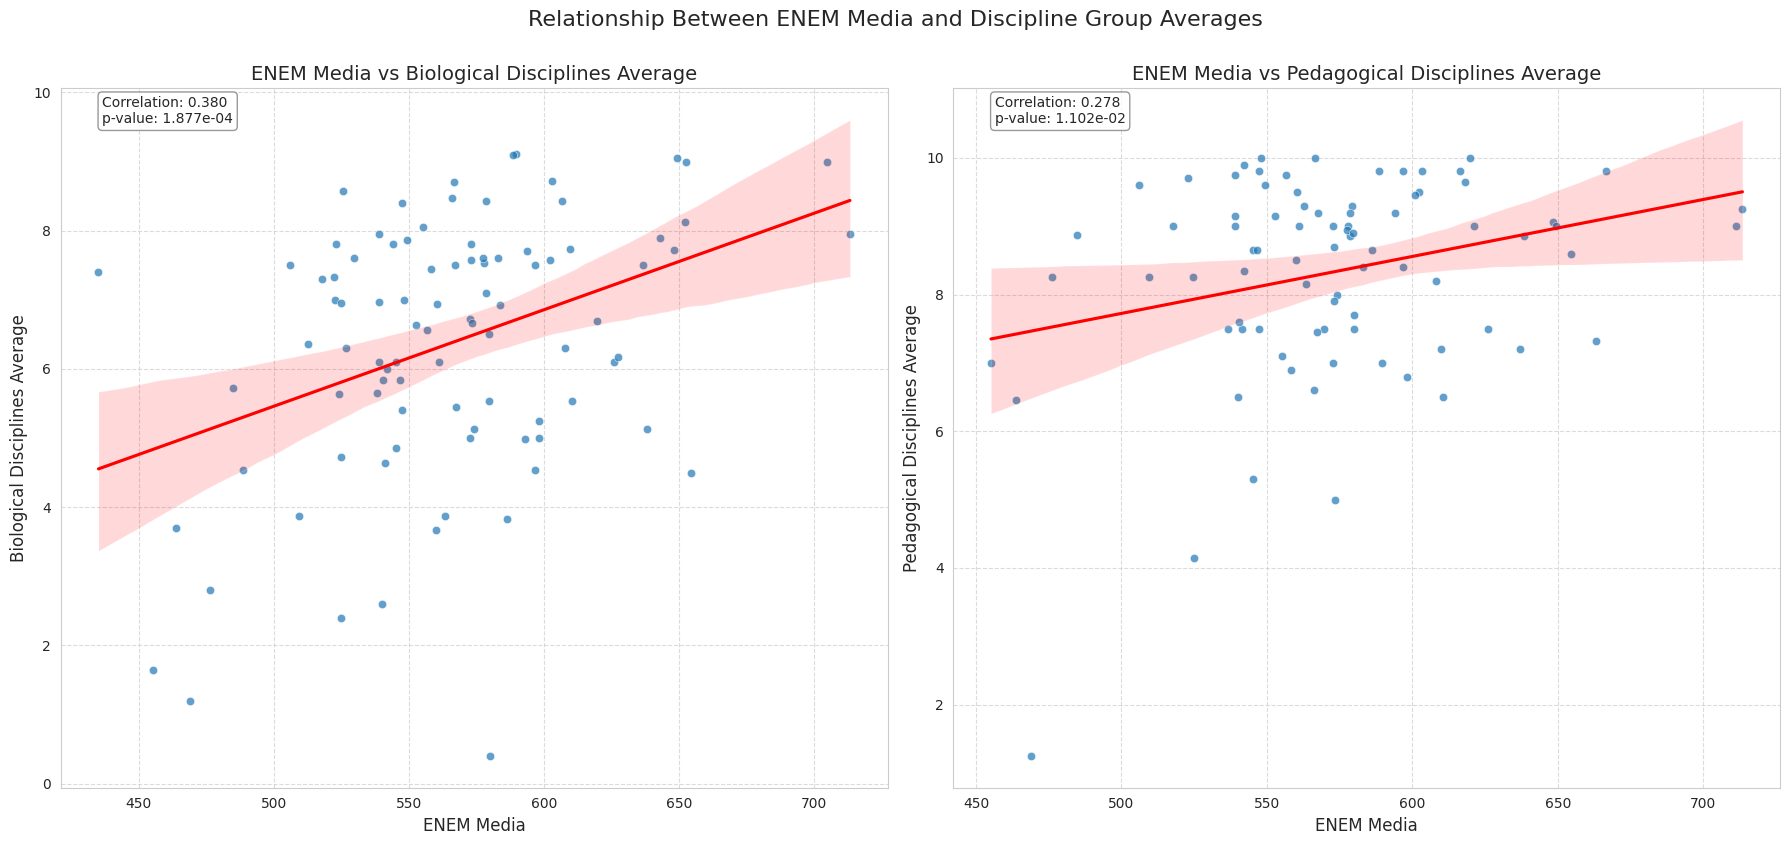

<Figure size 1800x1000 with 0 Axes>

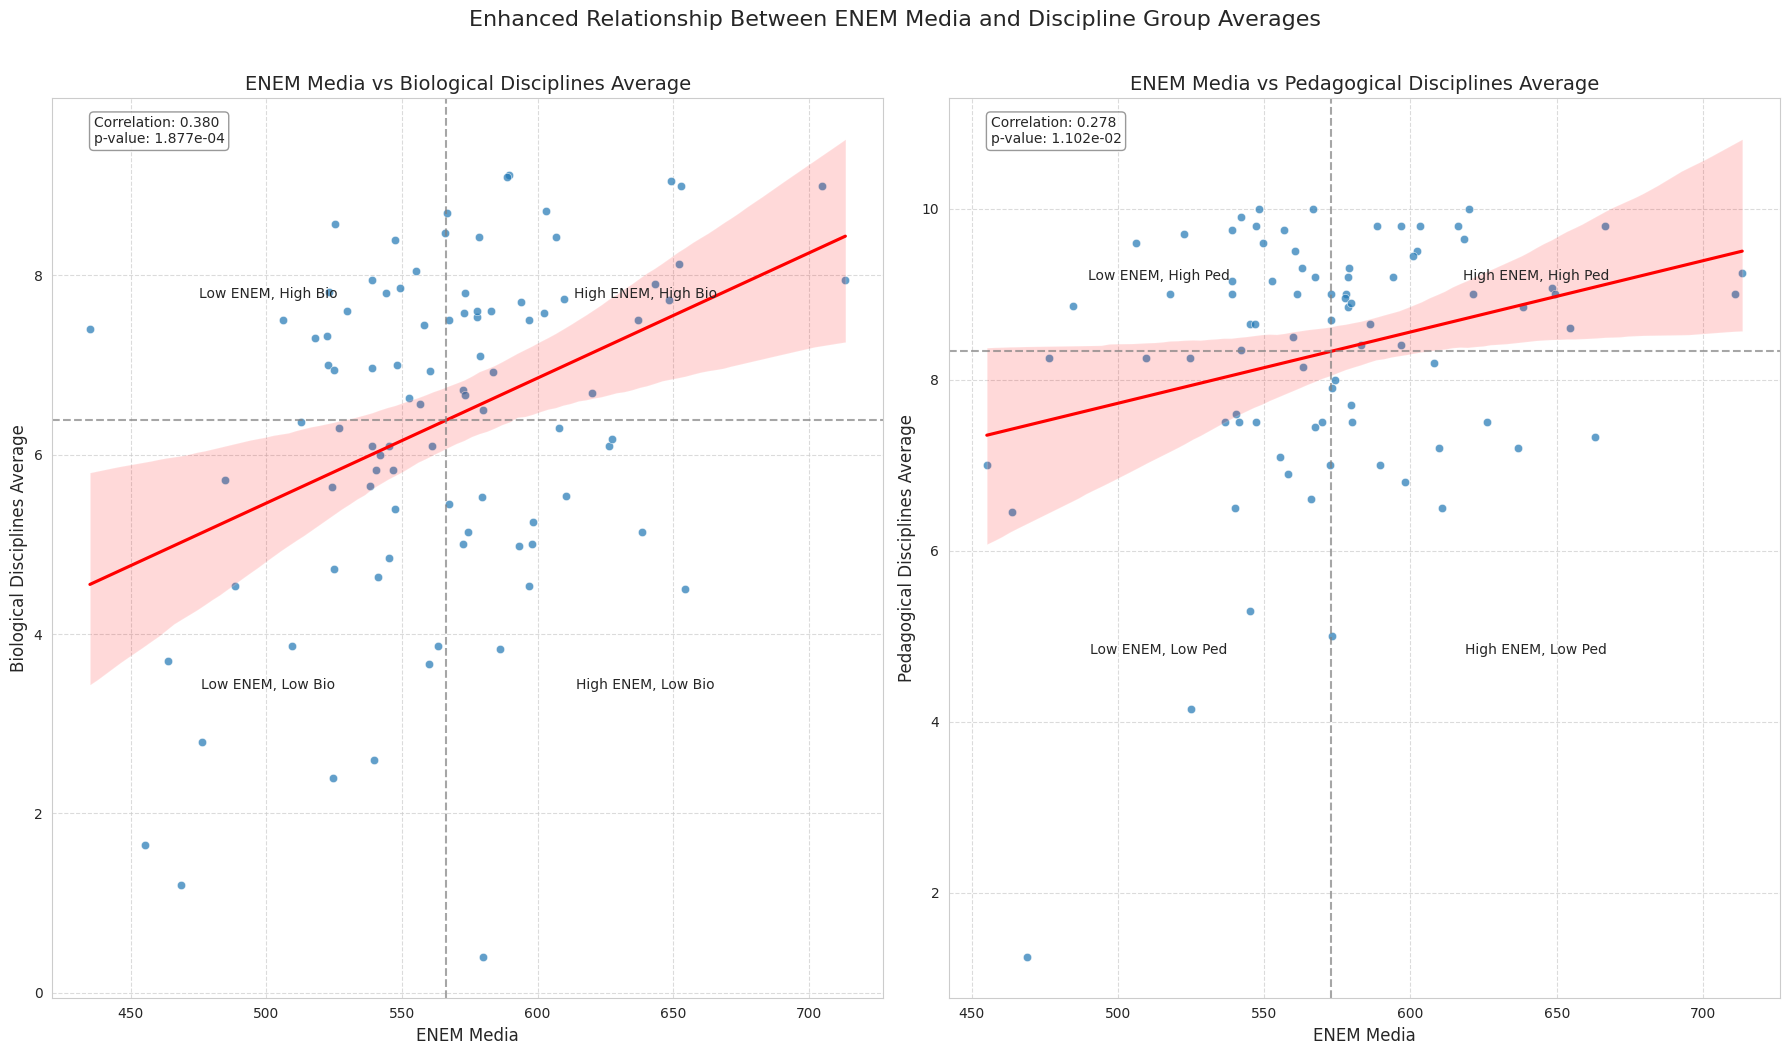

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df1_clean with Average_Grade column is already available
# If not, you would need to create it first

# Define discipline groups
biological_disciplines = [
    'Biologia Celular', 'Farm. Dep. Químicas', 'Gen. Ger.', 'Evol.',
    'Biof. Rad.', 'Bio. Div. Fung.', 'Morf. Anat. Veg.', 'Hist. II',
    'Fis. Anim. Com. I', 'Fis. Anim. Comp. II', 'Div. Anim. I',
    'Div. Anim. III', 'Bioq. II', 'Fis. Hum. I', 'Fun. Eco.', 'Fis. Veg. I'
]

pedagogical_disciplines = [
    'Fund. Met. Ens. Fund', 'Estágio Ciências II', 'Estágio Biologia II',
    'Did.', 'Fun. Met. Ens.', 'Fun. Met. Ens. Cie.', 'Est. Cie. I',
    'Elem. Soc. da Educ.', 'Ele. Fil. Educação', 'Psic. Educação', 'Soc. Edu. Rel. ER'
]

# Filter out rows where ENEM_media equals 0
df1_filtered = df1_clean[df1_clean['ENEM_media'] != 0]

# Create dataframes for each discipline group
# This assumes df1_filtered has columns for each discipline and student identifiers

# Function to calculate average grade for a group of disciplines
def calculate_group_average(df, discipline_list):
    # Select only the columns corresponding to the disciplines in the list
    # and calculate the row-wise mean (student's average in those disciplines)
    discipline_cols = [col for col in df.columns if col in discipline_list]
    if not discipline_cols:
        print(f"Warning: No matching columns found for disciplines. Available columns: {df.columns.tolist()}")
        return None

    return df[discipline_cols].mean(axis=1)

# Add group average columns
df1_filtered['Biological_Average'] = calculate_group_average(df1_filtered, biological_disciplines)
df1_filtered['Pedagogical_Average'] = calculate_group_average(df1_filtered, pedagogical_disciplines)

# Create scatter plots and calculate correlations for each group
plt.figure(figsize=(18, 8))

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 1. Biological Disciplines Plot
bio_data = df1_filtered.dropna(subset=['ENEM_media', 'Biological_Average'])
if not bio_data.empty:
    # Calculate correlation coefficient and p-value
    bio_correlation, bio_p_value = stats.pearsonr(bio_data['ENEM_media'], bio_data['Biological_Average'])

    # Create scatter plot
    sns.scatterplot(data=bio_data,
                    x='ENEM_media',
                    y='Biological_Average',
                    alpha=0.7,
                    ax=ax1)

    # Add regression line
    sns.regplot(data=bio_data,
               x='ENEM_media',
               y='Biological_Average',
               scatter=False,
               line_kws={"color": "red"},
               ax=ax1)

    # Add correlation information
    ax1.annotate(f'Correlation: {bio_correlation:.3f}\np-value: {bio_p_value:.3e}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Add titles and labels
    ax1.set_title('ENEM Media vs Biological Disciplines Average', fontsize=14)
    ax1.set_xlabel('ENEM Media', fontsize=12)
    ax1.set_ylabel('Biological Disciplines Average', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
else:
    ax1.text(0.5, 0.5, 'No data available for biological disciplines',
             horizontalalignment='center', verticalalignment='center')

# 2. Pedagogical Disciplines Plot
ped_data = df1_filtered.dropna(subset=['ENEM_media', 'Pedagogical_Average'])
if not ped_data.empty:
    # Calculate correlation coefficient and p-value
    ped_correlation, ped_p_value = stats.pearsonr(ped_data['ENEM_media'], ped_data['Pedagogical_Average'])

    # Create scatter plot
    sns.scatterplot(data=ped_data,
                    x='ENEM_media',
                    y='Pedagogical_Average',
                    alpha=0.7,
                    ax=ax2)

    # Add regression line
    sns.regplot(data=ped_data,
               x='ENEM_media',
               y='Pedagogical_Average',
               scatter=False,
               line_kws={"color": "red"},
               ax=ax2)

    # Add correlation information
    ax2.annotate(f'Correlation: {ped_correlation:.3f}\np-value: {ped_p_value:.3e}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Add titles and labels
    ax2.set_title('ENEM Media vs Pedagogical Disciplines Average', fontsize=14)
    ax2.set_xlabel('ENEM Media', fontsize=12)
    ax2.set_ylabel('Pedagogical Disciplines Average', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
else:
    ax2.text(0.5, 0.5, 'No data available for pedagogical disciplines',
             horizontalalignment='center', verticalalignment='center')

# Improve layout
plt.tight_layout()
plt.suptitle('Relationship Between ENEM Media and Discipline Group Averages', fontsize=16, y=1.05)

# Show the plot
plt.show()

# Create an enhanced version with additional insights
plt.figure(figsize=(18, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Enhanced Biological Disciplines Plot
if not bio_data.empty:
    # Create scatter plot
    sns.scatterplot(data=bio_data,
                    x='ENEM_media',
                    y='Biological_Average',
                    alpha=0.7,
                    ax=ax1)

    # Add regression line
    sns.regplot(data=bio_data,
               x='ENEM_media',
               y='Biological_Average',
               scatter=False,
               line_kws={"color": "red"},
               ax=ax1)

    # Calculate average values for reference lines
    avg_enem_bio = bio_data['ENEM_media'].mean()
    avg_bio = bio_data['Biological_Average'].mean()

    # Add reference lines at averages
    ax1.axvline(x=avg_enem_bio, color='gray', linestyle='--', alpha=0.7)
    ax1.axhline(y=avg_bio, color='gray', linestyle='--', alpha=0.7)

    # Add text labels for the quadrants
    ax1.annotate('High ENEM, High Bio',
                xy=(avg_enem_bio + (bio_data['ENEM_media'].max() - avg_enem_bio)/2,
                    avg_bio + (bio_data['Biological_Average'].max() - avg_bio)/2),
                ha='center')

    ax1.annotate('Low ENEM, High Bio',
                xy=(avg_enem_bio - (avg_enem_bio - bio_data['ENEM_media'].min())/2,
                    avg_bio + (bio_data['Biological_Average'].max() - avg_bio)/2),
                ha='center')

    ax1.annotate('High ENEM, Low Bio',
                xy=(avg_enem_bio + (bio_data['ENEM_media'].max() - avg_enem_bio)/2,
                    avg_bio - (avg_bio - bio_data['Biological_Average'].min())/2),
                ha='center')

    ax1.annotate('Low ENEM, Low Bio',
                xy=(avg_enem_bio - (avg_enem_bio - bio_data['ENEM_media'].min())/2,
                    avg_bio - (avg_bio - bio_data['Biological_Average'].min())/2),
                ha='center')

    # Add correlation information
    ax1.annotate(f'Correlation: {bio_correlation:.3f}\np-value: {bio_p_value:.3e}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Add titles and labels
    ax1.set_title('ENEM Media vs Biological Disciplines Average', fontsize=14)
    ax1.set_xlabel('ENEM Media', fontsize=12)
    ax1.set_ylabel('Biological Disciplines Average', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
else:
    ax1.text(0.5, 0.5, 'No data available for biological disciplines',
             horizontalalignment='center', verticalalignment='center')

# Enhanced Pedagogical Disciplines Plot
if not ped_data.empty:
    # Create scatter plot
    sns.scatterplot(data=ped_data,
                    x='ENEM_media',
                    y='Pedagogical_Average',
                    alpha=0.7,
                    ax=ax2)

    # Add regression line
    sns.regplot(data=ped_data,
               x='ENEM_media',
               y='Pedagogical_Average',
               scatter=False,
               line_kws={"color": "red"},
               ax=ax2)

    # Calculate average values for reference lines
    avg_enem_ped = ped_data['ENEM_media'].mean()
    avg_ped = ped_data['Pedagogical_Average'].mean()

    # Add reference lines at averages
    ax2.axvline(x=avg_enem_ped, color='gray', linestyle='--', alpha=0.7)
    ax2.axhline(y=avg_ped, color='gray', linestyle='--', alpha=0.7)

    # Add text labels for the quadrants
    ax2.annotate('High ENEM, High Ped',
                xy=(avg_enem_ped + (ped_data['ENEM_media'].max() - avg_enem_ped)/2,
                    avg_ped + (ped_data['Pedagogical_Average'].max() - avg_ped)/2),
                ha='center')

    ax2.annotate('Low ENEM, High Ped',
                xy=(avg_enem_ped - (avg_enem_ped - ped_data['ENEM_media'].min())/2,
                    avg_ped + (ped_data['Pedagogical_Average'].max() - avg_ped)/2),
                ha='center')

    ax2.annotate('High ENEM, Low Ped',
                xy=(avg_enem_ped + (ped_data['ENEM_media'].max() - avg_enem_ped)/2,
                    avg_ped - (avg_ped - ped_data['Pedagogical_Average'].min())/2),
                ha='center')

    ax2.annotate('Low ENEM, Low Ped',
                xy=(avg_enem_ped - (avg_enem_ped - ped_data['ENEM_media'].min())/2,
                    avg_ped - (avg_ped - ped_data['Pedagogical_Average'].min())/2),
                ha='center')

    # Add correlation information
    ax2.annotate(f'Correlation: {ped_correlation:.3f}\np-value: {ped_p_value:.3e}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Add titles and labels
    ax2.set_title('ENEM Media vs Pedagogical Disciplines Average', fontsize=14)
    ax2.set_xlabel('ENEM Media', fontsize=12)
    ax2.set_ylabel('Pedagogical Disciplines Average', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
else:
    ax2.text(0.5, 0.5, 'No data available for pedagogical disciplines',
             horizontalalignment='center', verticalalignment='center')

# Improve layout
plt.tight_layout()
plt.suptitle('Enhanced Relationship Between ENEM Media and Discipline Group Averages', fontsize=16, y=1.05)

# Show the enhanced plot
plt.show()

# Optional: Create an interactive version with Plotly
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.figure_factory as ff

    # Create subplots: 2 side-by-side
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("ENEM Media vs Biological Disciplines", "ENEM Media vs Pedagogical Disciplines")
    )

    # Biological Disciplines plot
    if not bio_data.empty:
        # Add scatter plot
        fig.add_trace(
            go.Scatter(
                x=bio_data['ENEM_media'],
                y=bio_data['Biological_Average'],
                mode='markers',
                name='Biological Disciplines',
                marker=dict(size=8, opacity=0.7),
                customdata=bio_data[['Matricula1']] if 'Matricula1' in bio_data.columns else None,
                hovertemplate='ENEM: %{x}<br>Bio Avg: %{y}<br>ID: %{customdata[0]}<extra></extra>' if 'Matricula1' in bio_data.columns else None
            ),
            row=1, col=1
        )

        # Add trendline
        import numpy as np
        from sklearn.linear_model import LinearRegression

        x = bio_data['ENEM_media'].values.reshape(-1, 1)
        y = bio_data['Biological_Average'].values
        model = LinearRegression().fit(x, y)
        x_range = np.linspace(bio_data['ENEM_media'].min(), bio_data['ENEM_media'].max(), 100).reshape(-1, 1)
        y_range = model.predict(x_range)

        fig.add_trace(
            go.Scatter(
                x=x_range.flatten(),
                y=y_range,
                mode='lines',
                name='Bio Trend',
                line=dict(color='red'),
                showlegend=False
            ),
            row=1, col=1
        )

        # Add annotation with correlation
        fig.add_annotation(
            x=0.15, y=0.95,
            xref="x domain", yref="y domain",
            text=f"Correlation: {bio_correlation:.3f}<br>p-value: {bio_p_value:.3e}",
            showarrow=False,
            font=dict(size=12),
            bgcolor="white",
            bordercolor="black",
            borderwidth=1,
            row=1, col=1
        )

    # Pedagogical Disciplines plot
    if not ped_data.empty:
        # Add scatter plot
        fig.add_trace(
            go.Scatter(
                x=ped_data['ENEM_media'],
                y=ped_data['Pedagogical_Average'],
                mode='markers',
                name='Pedagogical Disciplines',
                marker=dict(size=8, opacity=0.7, color='green'),
                customdata=ped_data[['Matricula1']] if 'Matricula1' in ped_data.columns else None,
                hovertemplate='ENEM: %{x}<br>Ped Avg: %{y}<br>ID: %{customdata[0]}<extra></extra>' if 'Matricula1' in ped_data.columns else None
            ),
            row=1, col=2
        )

        # Add trendline
        x = ped_data['ENEM_media'].values.reshape(-1, 1)
        y = ped_data['Pedagogical_Average'].values
        model = LinearRegression().fit(x, y)
        x_range = np.linspace(ped_data['ENEM_media'].min(), ped_data['ENEM_media'].max(), 100).reshape(-1, 1)
        y_range = model.predict(x_range)

        fig.add_trace(
            go.Scatter(
                x=x_range.flatten(),
                y=y_range,
                mode='lines',
                name='Ped Trend',
                line=dict(color='red'),
                showlegend=False
            ),
            row=1, col=2
        )

        # Add annotation with correlation
        fig.add_annotation(
            x=0.15, y=0.95,
            xref="x2 domain", yref="y2 domain",
            text=f"Correlation: {ped_correlation:.3f}<br>p-value: {ped_p_value:.3e}",
            showarrow=False,
            font=dict(size=12),
            bgcolor="white",
            bordercolor="black",
            borderwidth=1,
            row=1, col=2
        )

    # Update layout
    fig.update_layout(
        title_text="Interactive: ENEM Media vs Discipline Group Averages",
        height=700,
        width=1200,
        showlegend=True
    )

    # Update x and y axis labels
    fig.update_xaxes(title_text="ENEM Media", row=1, col=1)
    fig.update_yaxes(title_text="Biological Disciplines Average", row=1, col=1)
    fig.update_xaxes(title_text="ENEM Media", row=1, col=2)
    fig.update_yaxes(title_text="Pedagogical Disciplines Average", row=1, col=2)

    # Show the interactive plot
    fig.show()

    # To save the interactive plot as HTML:
    # fig.write_html("enem_vs_discipline_groups_interactive.html")

except ImportError:
    print("Plotly or scikit-learn not installed. Skipping interactive plot.")
except Exception as e:
    print(f"Error creating interactive plot: {e}")

## Comparação entre os resumos das notas por disciplina

Error loading files: [Errno 2] No such file or directory: 'course_statistics_semI.csv'
Creating sample data for demonstration
Courses with N > 3: 24 out of 40
Unique course names with N > 3: 10


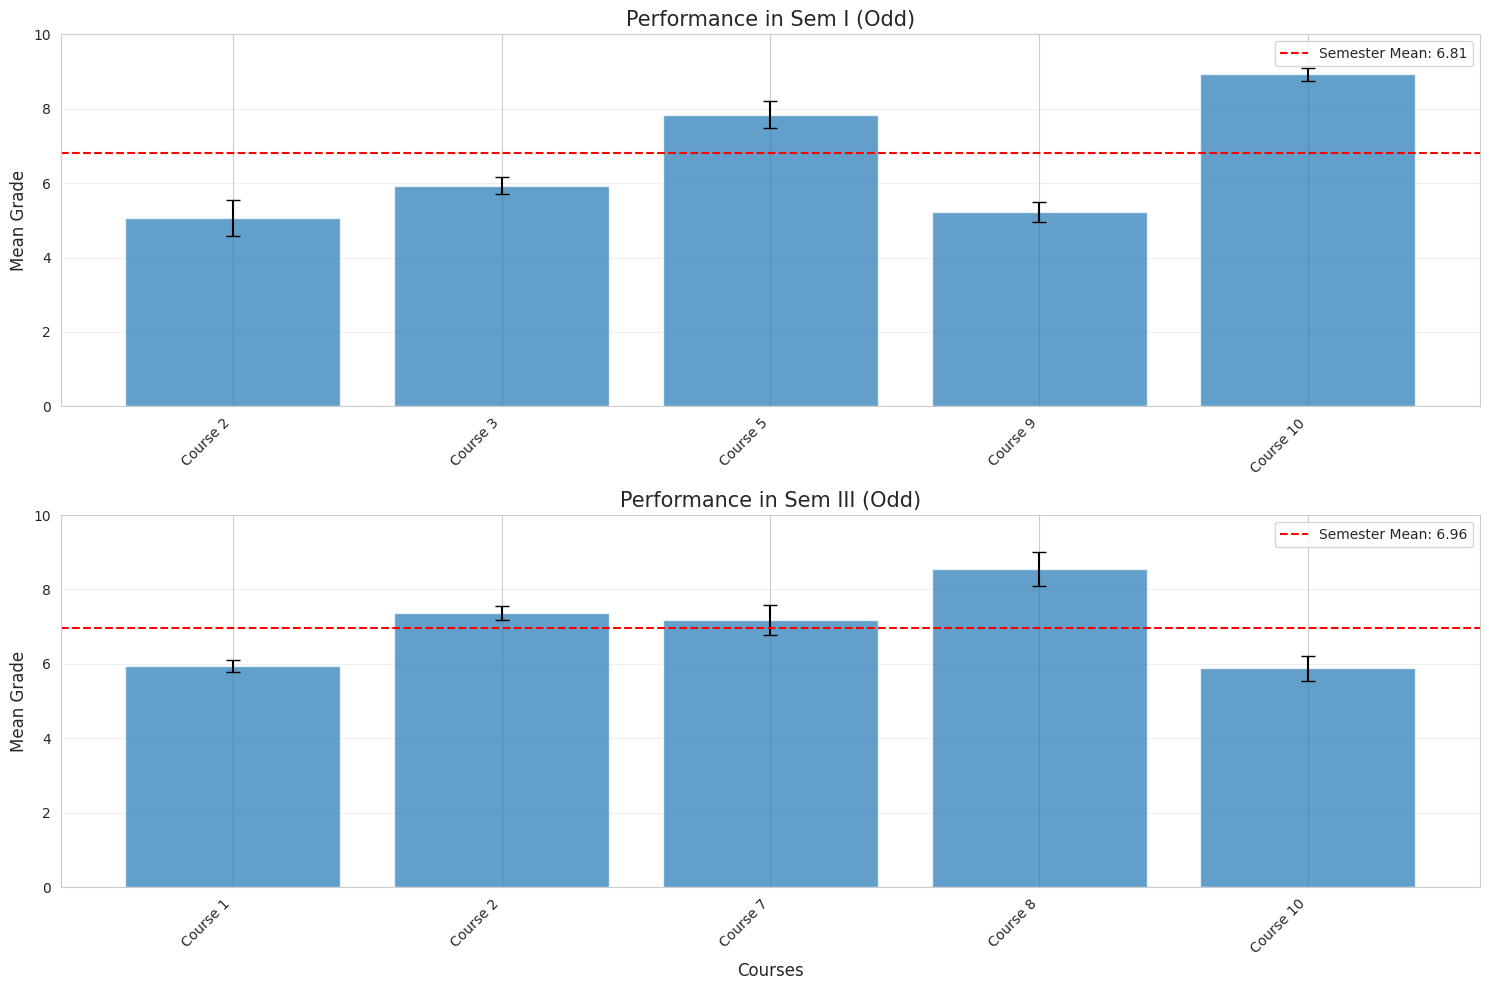

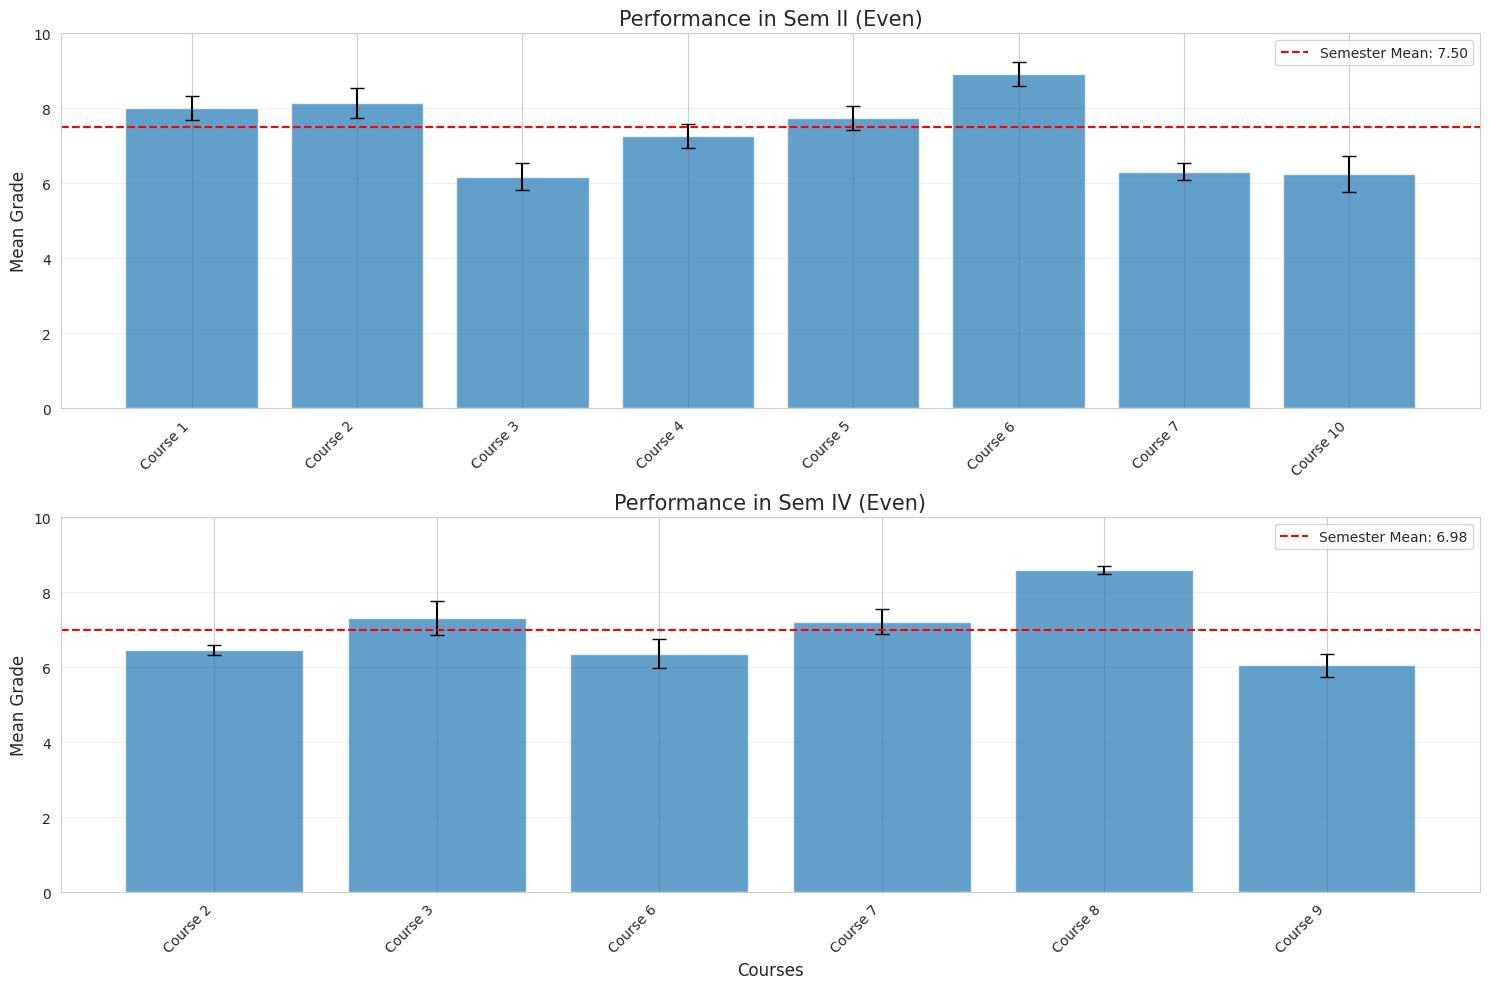

<ipython-input-29-400c31714cab>:185: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




Semester Average Comparisons:
Sem I: 6.81 ± 0.16
Sem II: 7.50 ± 0.12
Sem III: 6.96 ± 0.16
Sem IV: 6.98 ± 0.13

Overall Program Average: 7.06

Analysis complete. Generated and displayed plots:
1. Odd semesters comparison (Semesters I and III) - displayed with option to save
2. Even semesters comparison (Semesters II and IV) - displayed with option to save
3. Overall semester averages comparison - saved as 'semester_averages_comparison.png'
4. Course-semester heatmap - saved as 'course_semester_heatmap.png'

Note: To save the odd and even semester plots, uncomment the plt.savefig() lines in the code.


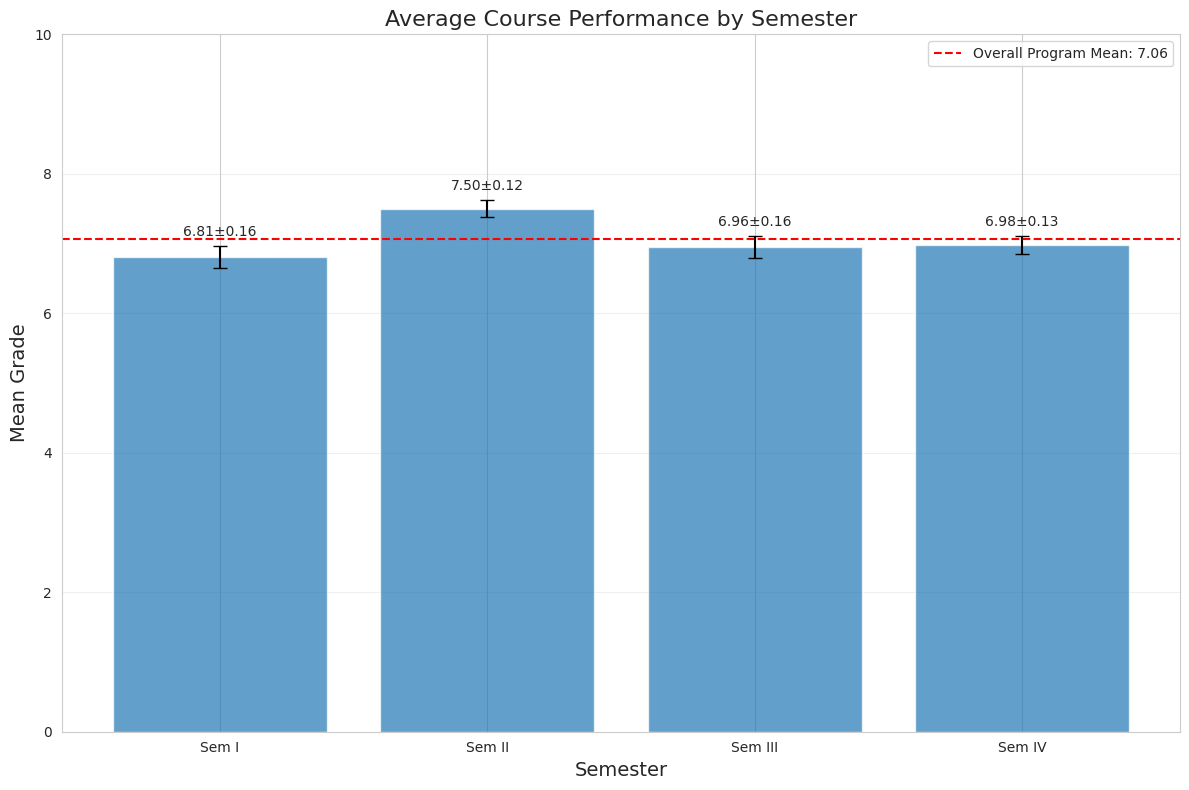

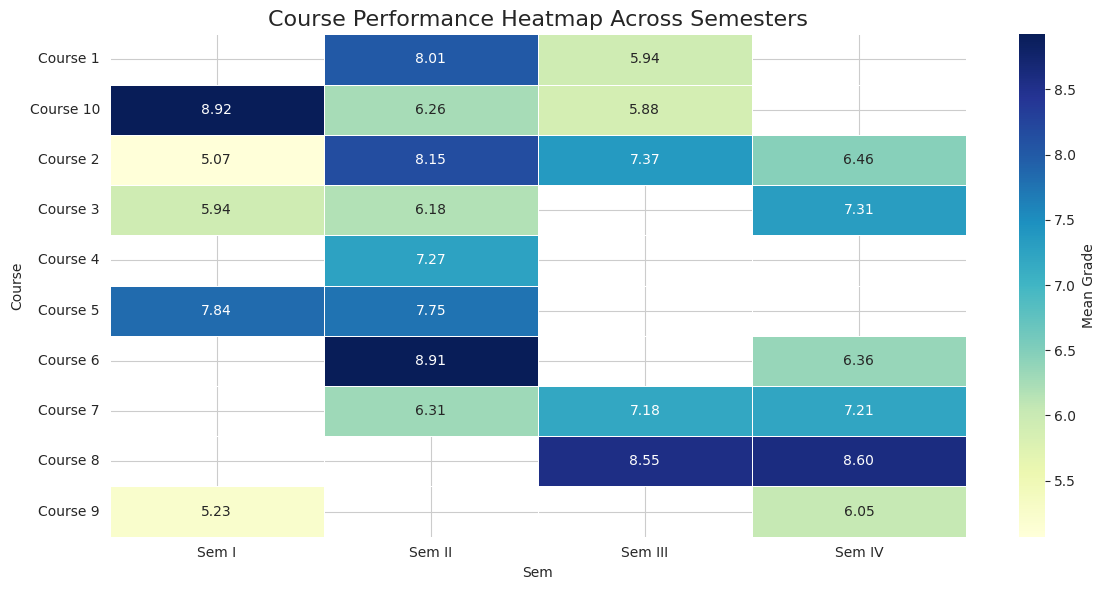

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the four semester files
try:
    df_sem1 = pd.read_csv('course_statistics_semI.csv')
    df_sem2 = pd.read_csv('course_statistics_semII.csv')
    df_sem3 = pd.read_csv('course_statistics_semIII.csv')
    df_sem4 = pd.read_csv('course_statistics_semIV.csv')

    # Print basic info to verify data loaded correctly
    print(f"Loaded courses: Sem I: {len(df_sem1)}, Sem II: {len(df_sem2)}, "
          f"Sem III: {len(df_sem3)}, Sem IV: {len(df_sem4)}")
except Exception as e:
    print(f"Error loading files: {e}")
    # Create sample data for demonstration if files don't exist
    print("Creating sample data for demonstration")

    # Function to create sample data
    def create_sample_data(sem_num):
        courses = [f"Course {i}" for i in range(1, 11)]
        means = np.random.uniform(5.0, 9.0, len(courses))
        ses = np.random.uniform(0.1, 0.5, len(courses))
        ns = np.random.randint(1, 10, len(courses))
        return pd.DataFrame({
            'Course': courses,
            'Mean': means,
            'SE': ses,
            'N': ns,
            'Sem': f"Sem {sem_num}"
        })

    df_sem1 = create_sample_data('I')
    df_sem2 = create_sample_data('II')
    df_sem3 = create_sample_data('III')
    df_sem4 = create_sample_data('IV')

# Combine all dataframes but add a semester identifier
df_sem1['Sem'] = 'Sem I'
df_sem2['Sem'] = 'Sem II'
df_sem3['Sem'] = 'Sem III'
df_sem4['Sem'] = 'Sem IV'

# Combine all dataframes
all_data = pd.concat([df_sem1, df_sem2, df_sem3, df_sem4], ignore_index=True)

# Filter to only include courses with N > 3
filtered_data = all_data[all_data['N'] > 3]
print(f"Courses with N > 3: {len(filtered_data)} out of {len(all_data)}")

# Get unique course names across all semesters after filtering
unique_courses = filtered_data['Course'].unique()
print(f"Unique course names with N > 3: {len(unique_courses)}")

# Create a bar chart for each semester file (four graphs)
semester_dfs = [
    ("Sem I (Odd)", df_sem1[df_sem1['N'] > 3]),
    ("Sem II (Even)", df_sem2[df_sem2['N'] > 3]),
    ("Sem III (Odd)", df_sem3[df_sem3['N'] > 3]),
    ("Sem IV (Even)", df_sem4[df_sem4['N'] > 3])
]

# Create plots for odd semesters (I and III)
plt.figure(figsize=(15, 10))

# Configure subplots: 2x1 grid for odd semesters
plt.subplot(2, 1, 1)
sem_data = semester_dfs[0][1]  # Sem I data
courses = sem_data['Course'].tolist()
means = sem_data['Mean'].tolist()
errors = sem_data['SE'].tolist()

# Create bar plot with error bars for Sem I
bars = plt.bar(courses, means, alpha=0.7)
plt.errorbar(courses, means, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Calculate and add horizontal line for semester average
sem_avg = np.average(means, weights=sem_data['N'])
plt.axhline(y=sem_avg, color='r', linestyle='--', label=f'Semester Mean: {sem_avg:.2f}')

# Add labels and title for Sem I
plt.title(f'Performance in {semester_dfs[0][0]}', fontsize=15)
plt.ylabel('Mean Grade', fontsize=12)
plt.ylim(0, 10)  # Assuming grades are on a 0-10 scale
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Create bar plot for Sem III
plt.subplot(2, 1, 2)
sem_data = semester_dfs[2][1]  # Sem III data
courses = sem_data['Course'].tolist()
means = sem_data['Mean'].tolist()
errors = sem_data['SE'].tolist()

# Create bar plot with error bars for Sem III
bars = plt.bar(courses, means, alpha=0.7)
plt.errorbar(courses, means, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Calculate and add horizontal line for semester average
sem_avg = np.average(means, weights=sem_data['N'])
plt.axhline(y=sem_avg, color='r', linestyle='--', label=f'Semester Mean: {sem_avg:.2f}')

# Add labels and title for Sem III
plt.title(f'Performance in {semester_dfs[2][0]}', fontsize=15)
plt.ylabel('Mean Grade', fontsize=12)
plt.xlabel('Courses', fontsize=12)
plt.ylim(0, 10)  # Assuming grades are on a 0-10 scale
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.gcf().canvas.manager.set_window_title('Odd Semesters Comparison')
plt.show()
# Uncomment the line below to save the figure
# plt.savefig("odd_semesters_comparison.png")
# plt.close()

# Create plots for even semesters (II and IV)
plt.figure(figsize=(15, 10))

# Configure subplots: 2x1 grid for even semesters
plt.subplot(2, 1, 1)
sem_data = semester_dfs[1][1]  # Sem II data
courses = sem_data['Course'].tolist()
means = sem_data['Mean'].tolist()
errors = sem_data['SE'].tolist()

# Create bar plot with error bars for Sem II
bars = plt.bar(courses, means, alpha=0.7)
plt.errorbar(courses, means, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Calculate and add horizontal line for semester average
sem_avg = np.average(means, weights=sem_data['N'])
plt.axhline(y=sem_avg, color='r', linestyle='--', label=f'Semester Mean: {sem_avg:.2f}')

# Add labels and title for Sem II
plt.title(f'Performance in {semester_dfs[1][0]}', fontsize=15)
plt.ylabel('Mean Grade', fontsize=12)
plt.ylim(0, 10)  # Assuming grades are on a 0-10 scale
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Create bar plot for Sem IV
plt.subplot(2, 1, 2)
sem_data = semester_dfs[3][1]  # Sem IV data
courses = sem_data['Course'].tolist()
means = sem_data['Mean'].tolist()
errors = sem_data['SE'].tolist()

# Create bar plot with error bars for Sem IV
bars = plt.bar(courses, means, alpha=0.7)
plt.errorbar(courses, means, yerr=errors, fmt='none', ecolor='black', capsize=5)

# Calculate and add horizontal line for semester average
sem_avg = np.average(means, weights=sem_data['N'])
plt.axhline(y=sem_avg, color='r', linestyle='--', label=f'Semester Mean: {sem_avg:.2f}')

# Add labels and title for Sem IV
plt.title(f'Performance in {semester_dfs[3][0]}', fontsize=15)
plt.ylabel('Mean Grade', fontsize=12)
plt.xlabel('Courses', fontsize=12)
plt.ylim(0, 10)  # Assuming grades are on a 0-10 scale
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.gcf().canvas.manager.set_window_title('Even Semesters Comparison')
plt.show()
# Uncomment the line below to save the figure
# plt.savefig("even_semesters_comparison.png")
# plt.close()

# Now create a summary plot with all semester averages (keeping this as requested)
plt.figure(figsize=(12, 8))

# Calculate average grade per semester (for courses with N > 3)
sem_averages = filtered_data.groupby('Sem').apply(
    lambda x: np.average(x['Mean'], weights=x['N'])
).reset_index()
sem_averages.columns = ['Sem', 'Average']

# Calculate standard error for each semester average
sem_errors = []
for sem in sem_averages['Sem']:
    sem_data = filtered_data[filtered_data['Sem'] == sem]
    # Weighted standard error
    weights = sem_data['N'] / sem_data['N'].sum()
    variance = np.sum(weights**2 * sem_data['SE']**2)
    sem_errors.append(np.sqrt(variance))

# Plot semester averages
bars = plt.bar(sem_averages['Sem'], sem_averages['Average'], alpha=0.7)
plt.errorbar(sem_averages['Sem'], sem_averages['Average'], yerr=sem_errors,
             fmt='none', ecolor='black', capsize=5)

# Add overall average line
overall_avg = np.average(sem_averages['Average'])
plt.axhline(y=overall_avg, color='r', linestyle='--',
            label=f'Overall Program Mean: {overall_avg:.2f}')

# Add data labels
for bar, avg, err in zip(bars, sem_averages['Average'], sem_errors):
    plt.text(bar.get_x() + bar.get_width()/2,
             avg + err + 0.1,
             f'{avg:.2f}±{err:.2f}',
             ha='center', va='bottom')

# Add title and labels
plt.title('Average Course Performance by Semester', fontsize=16)
plt.ylabel('Mean Grade', fontsize=14)
plt.xlabel('Semester', fontsize=14)
plt.ylim(0, 10)  # Assuming grades are on a 0-10 scale
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()

# Save the semester summary plot
plt.savefig("semester_averages_comparison.png")

# Calculate and display comparison statistics
print("\nSemester Average Comparisons:")
for i, row in sem_averages.iterrows():
    print(f"{row['Sem']}: {row['Average']:.2f} ± {sem_errors[i]:.2f}")

print(f"\nOverall Program Average: {overall_avg:.2f}")

# Create a heatmap showing course means across semesters
pivot_data = filtered_data.pivot_table(
    index='Course',
    columns='Sem',
    values='Mean',
    aggfunc='mean'
)

plt.figure(figsize=(12, len(pivot_data) * 0.4 + 2))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f',
            linewidths=.5, cbar_kws={'label': 'Mean Grade'})
plt.title('Course Performance Heatmap Across Semesters', fontsize=16)
plt.tight_layout()
plt.savefig("course_semester_heatmap.png")

print("\nAnalysis complete. Generated and displayed plots:")
print("1. Odd semesters comparison (Semesters I and III) - displayed with option to save")
print("2. Even semesters comparison (Semesters II and IV) - displayed with option to save")
print("3. Overall semester averages comparison - saved as 'semester_averages_comparison.png'")
print("4. Course-semester heatmap - saved as 'course_semester_heatmap.png'")
print("\nNote: To save the odd and even semester plots, uncomment the plt.savefig() lines in the code.")